# Introduction: 
In this challenge, we took a deep dive into the media service and original programming production company, Netflix. Investigating genre, reviews, and rating statistics to gain a better understanding of the company's strategy. 

# Main Hypothesis
If a title located on Netflix is classified under the "Action" genre, then it is more likely to have a higher IMDB user rating.

# Step 1: Pulling data from OMDB
Throughout the entire course of our analysis, we will be using the data provided from OMDB's API. 

In [48]:
#import dependencies 
#import dependencies to read the files 
import os 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
import requests
from config import api_key
from pprint import pprint


In [49]:
#import api_key
from config import api_key 

In [50]:
# File to Load
file_to_load = "../Data/netflix_titles_CLEANSEDcsv.csv"

# Read Purchasing File and store into Pandas data frame
Netflix_Titles = pd.read_csv(file_to_load)
#drop rows with any missing values 
Netflix_Titles.dropna(how='any')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [51]:
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=" + api_key

# Creating a loop
- To begin our API pulls, we first created a loop to run through the Netflix Title data set, storing all of the titles in an empty list.
- Next, we ran a test request in order to identify how OMDB listed their data. This allowed us to specify what information we wanted to request.
- We then created another loop to run our stored titles through the API, requesting Title, Genre, IMBD Rating, Number of IMDB votes, and Rating (G, PG, PG-13, R, etc.)

In [52]:
#create empty list to store data
imdb= []
for titles in Netflix_Titles["title"]:
    imdb.append(titles)

In [53]:
#test request to view layout
response = requests.get(url + "Da Kath & Kim Code" + api_key)

data = response.json()
pprint(data)



{'Actors': 'Jane Turner, Gina Riley, Glenn Robbins, Peter Rowsthorn',
 'Awards': '2 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'Australia',
 'DVD': '27 Sep 2016',
 'Director': 'Ted Emery',
 'Genre': 'Comedy',
 'Language': 'English',
 'Metascore': 'N/A',
 'Plot': 'Film adaptation of the Australian comedy series Kath and Kim.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjc0Nzc5ZDAtNTdmMS00OGMyLWI1ZGEtMTIyZTFlYzcwYTkzXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_SX300.jpg',
 'Production': 'N/A',
 'Rated': 'TV-14',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.4/10'}],
 'Released': '27 Nov 2005',
 'Response': 'True',
 'Runtime': '82 min',
 'Title': 'Da Kath & Kim Code',
 'Type': 'movie',
 'Website': 'N/A',
 'Writer': 'Gina Riley (creator), Jane Turner (creator), Gina Riley, Jane '
           'Turner, Magda Szubanski (character Sharon Strzelecki), Magda '
           'Szubanski (additional material)',
 'Year': '2005',
 'imdbID': 'tt0484275',
 'imdbRating': '7.4',
 'imdbVot

In [54]:
url2 = "http://www.omdbapi.com/?apikey=" + api_key + "&t="
responses=[]
movie_title= []
imdb_rating= []
imdb_votes= []
movie_genre= []
rating= []

for movie in imdb:
    try: 
        movie_data = requests.get(url + movie + api_key).json()
        responses.append(movie_data)
        movie_title.append(movie_data["Title"])
        imdb_rating.append(movie_data['imdbRating'])
        movie_genre.append(movie_data["Genre"])
        imdb_votes.append(movie_data["imdbVotes"])
        rating.append(movie_data['Rated'])
        print(f"The Netflix Title {movie_data['Title']}.")
        print(f"Received an IMDB rating of {movie_data['imdbRating']} generated from {movie_data['imdbVotes']} votes.")
        print(f"And falls under the {movie_data['Genre']} genre.")
    except(KeyError, IndexError):
        print("Missing Results.")
        
    print("------------")

The Netflix Title 3%.
Received an IMDB rating of 7.4 generated from 23,532 votes.
And falls under the Action, Drama, Sci-Fi genre.
------------
The Netflix Title 7:19.
Received an IMDB rating of 5.9 generated from 623 votes.
And falls under the Drama, History genre.
------------
The Netflix Title 23:59.
Received an IMDB rating of 4.6 generated from 940 votes.
And falls under the Horror genre.
------------
The Netflix Title 9.
Received an IMDB rating of 7.1 generated from 136,590 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title 21.
Received an IMDB rating of 6.8 generated from 238,461 votes.
And falls under the Crime, Drama, History genre.
------------
The Netflix Title 46.
Received an IMDB rating of 7.4 generated from 19 votes.
And falls under the Short, Drama genre.
------------
The Netflix Title 122.
Received an IMDB rating of 6.0 generated from 5,449 votes.
And falls under the Horror, Thriller genre.
------------
The Netflix Title 187.
Re

The Netflix Title 2 States.
Received an IMDB rating of 6.9 generated from 24,632 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title 20 Minutes.
Received an IMDB rating of 8.6 generated from 320 votes.
And falls under the Thriller genre.
------------
The Netflix Title 2015 Dream Concert.
Received an IMDB rating of 6.2 generated from 19 votes.
And falls under the Music genre.
------------
The Netflix Title 2036 Origin Unknown.
Received an IMDB rating of 4.4 generated from 9,502 votes.
And falls under the Action, Sci-Fi, Thriller genre.
------------
The Netflix Title 20th Century Women.
Received an IMDB rating of 7.3 generated from 42,925 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title 21.
Received an IMDB rating of 6.8 generated from 238,461 votes.
And falls under the Crime, Drama, History genre.
------------
The Netflix Title 21 Again.
Received an IMDB rating of 5.1 generated from 40 votes.

The Netflix Title 93 Days.
Received an IMDB rating of 6.0 generated from 1,600 votes.
And falls under the Drama genre.
------------
The Netflix Title A 2nd Chance.
Received an IMDB rating of 5.1 generated from 9 votes.
And falls under the Crime, Thriller genre.
------------
The Netflix Title A 3 Minute Hug.
Received an IMDB rating of 6.5 generated from 216 votes.
And falls under the Documentary, Short genre.
------------
The Netflix Title A Babysitter's Guide to Monster Hunting.
Received an IMDB rating of 5.4 generated from 3,702 votes.
And falls under the Comedy, Family, Fantasy genre.
------------
The Netflix Title A Bad Moms Christmas.
Received an IMDB rating of 5.6 generated from 47,250 votes.
And falls under the Comedy genre.
------------
The Netflix Title A Beautiful Life.
Received an IMDB rating of 6.7 generated from 496 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title A Billion Colour Story.
Received an IMDB rating of 8.1 generated from 434 votes.

The Netflix Title A Perfect Crime.
Received an IMDB rating of 7.3 generated from 1,291 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title A Perfect Ending.
Received an IMDB rating of 5.7 generated from 4,154 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title A Perfect Man.
Received an IMDB rating of 5.2 generated from 2,042 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title A Plastic Ocean.
Received an IMDB rating of 8.0 generated from 2,871 votes.
And falls under the Documentary genre.
------------
The Netflix Title A Princess for Christmas.
Received an IMDB rating of 6.4 generated from 7,413 votes.
And falls under the Comedy, Drama, Family, Romance genre.
------------
The Netflix Title A Queen Is Born.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the N/A genre.
------------
Missing Results.
------------
The Netflix Title A Russell Peters Christmas Special.
Received a

The Netflix Title Abby Hatcher.
Received an IMDB rating of 6.2 generated from 144 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Abby Sen.
Received an IMDB rating of 5.9 generated from 344 votes.
And falls under the Comedy, Drama, Sci-Fi genre.
------------
The Netflix Title Chunar ABCD 2 Cover by Vivek Verma.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Music genre.
------------
The Netflix Title ABCD (Any Body Can Dance).
Received an IMDB rating of 6.3 generated from 6,699 votes.
And falls under the Drama, Music genre.
------------
Missing Results.
------------
The Netflix Title Abducted in Plain Sight.
Received an IMDB rating of 6.8 generated from 17,549 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title Abdullah: The Final Witness.
Received an IMDB rating of 7.0 generated from 78 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Abhinet

Missing Results.
------------
The Netflix Title Age of Rebellion.
Received an IMDB rating of 8.5 generated from 43 votes.
And falls under the Crime, Drama, Romance genre.
------------
The Netflix Title Age of Tanks.
Received an IMDB rating of 7.3 generated from 739 votes.
And falls under the Documentary genre.
------------
The Netflix Title Agent.
Received an IMDB rating of 4.6 generated from 1,753 votes.
And falls under the Action, Sci-Fi, Thriller genre.
------------
The Netflix Title Agent Raghav.
Received an IMDB rating of 7.0 generated from 101 votes.
And falls under the Crime genre.
------------
The Netflix Title Aggretsuko.
Received an IMDB rating of 8.0 generated from 5,410 votes.
And falls under the Animation, Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title Agneepath.
Received an IMDB rating of 6.9 generated from 23,395 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Agustín Aristarán: Soy Rada.
Received a

The Netflix Title Duk haan chau faan.
Received an IMDB rating of 6.3 generated from 330 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title All About Nina.
Received an IMDB rating of 6.1 generated from 2,567 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title All About The Washingtons.
Received an IMDB rating of 4.5 generated from 679 votes.
And falls under the Comedy, Music genre.
------------
The Netflix Title All American.
Received an IMDB rating of 7.6 generated from 8,579 votes.
And falls under the Drama, Sport genre.
------------
The Netflix Title All Because of You.
Received an IMDB rating of 4.0 generated from 207 votes.
And falls under the Action, Comedy, Romance genre.
------------
The Netflix Title All Day and a Night.
Received an IMDB rating of 5.8 generated from 3,429 votes.
And falls under the Drama genre.
------------
The Netflix Title All Dogs Go to Heaven.
Received an IMDB rating of 6.8 generated from 39,

The Netflix Title American Honey.
Received an IMDB rating of 7.0 generated from 40,905 votes.
And falls under the Adventure, Drama, Romance genre.
------------
The Netflix Title American Horror Story.
Received an IMDB rating of 8.0 generated from 294,926 votes.
And falls under the Drama, Horror, Thriller genre.
------------
Missing Results.
------------
The Netflix Title American Murder: The Family Next Door.
Received an IMDB rating of 7.2 generated from 23,734 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title American Odyssey.
Received an IMDB rating of 7.3 generated from 6,051 votes.
And falls under the Action, Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title American Psycho.
Received an IMDB rating of 7.6 generated from 529,166 votes.
And falls under the Comedy, Crime, Drama genre.
------------
The Netflix Title American Son.
Received an IMDB rating of 5.8 generated from 6,697 votes.
And falls under the Drama genre

The Netflix Title Anjaan: Rural Myths.
Received an IMDB rating of 6.1 generated from 99 votes.
And falls under the Horror genre.
------------
The Netflix Title Anjaan: Special Crimes Unit.
Received an IMDB rating of 7.3 generated from 301 votes.
And falls under the Horror, Mystery, Thriller genre.
------------
The Netflix Title Anjelah Johnson: Not Fancy.
Received an IMDB rating of 5.8 generated from 617 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Ankhon Dekhi.
Received an IMDB rating of 8.0 generated from 11,028 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Ankur Arora Murder Case.
Received an IMDB rating of 6.5 generated from 1,913 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Annabelle Hooper and the Ghosts of Nantucket.
Received an IMDB rating of 5.6 generated from 740 votes.
And falls under the Adventure, Family, Mystery genre.
------------
Missing Results.
------------
The

The Netflix Title Ashes of Love.
Received an IMDB rating of 8.4 generated from 1,696 votes.
And falls under the Comedy, Fantasy, Romance genre.
------------
The Netflix Title Ask the Doctor.
Received an IMDB rating of 6.5 generated from 279 votes.
And falls under the Documentary genre.
------------
The Netflix Title Ask the StoryBots.
Received an IMDB rating of 8.3 generated from 793 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Asoka.
Received an IMDB rating of 6.5 generated from 13,768 votes.
And falls under the Action, Biography, Drama genre.
------------
The Netflix Title Asperger's Are Us.
Received an IMDB rating of 6.7 generated from 700 votes.
And falls under the Documentary, Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title Assimilate.
Received an IMDB rating of 5.3 generated from 6,495 votes.
And falls under the Horror, Mystery, Sci-Fi genre.
------------
Missing Results.
------------
Missing Resul

Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Baazaar.
Received an IMDB rating of 6.6 generated from 5,065 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Babam ve Oglum.
Received an IMDB rating of 8.2 generated from 83,269 votes.
And falls under the Drama, Family genre.
------------
The Netflix Title Babamin Ceketi.
Received an IMDB rating of 4.9 generated from 828 votes.
And falls under the Comedy genre.
------------
The Netflix Title Babel.
Received an IMDB rating of 7.4 generated from 296,100 votes.
And falls under the Drama genre.
------------
The Netflix Title Babies.
Received an IMDB rating of 6.9 generated from 705 votes.
And falls under the Documentary genre.
------------
The Netflix Title Baby.
Received an IMDB rating of 8.0 generated from 55,641 votes.
And falls under the Action, Thriller genre.
------------
The Netflix Title Baby Ballroom.
Received an IMDB rating of 7.7 gen

The Netflix Title Bangkok Love Stories: Plead.
Received an IMDB rating of 7.2 generated from 49 votes.
And falls under the Drama genre.
------------
Missing Results.
------------
The Netflix Title Barça Dreams.
Received an IMDB rating of 7.3 generated from 1,020 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title Barah Aana.
Received an IMDB rating of 6.8 generated from 1,195 votes.
And falls under the Comedy, Crime, Drama genre.
------------
Missing Results.
------------
The Netflix Title Barbarians.
Received an IMDB rating of 7.2 generated from 20,995 votes.
And falls under the Action, Adventure, Drama genre.
------------
The Netflix Title Barbecue.
Received an IMDB rating of 6.1 generated from 2,748 votes.
And falls under the Comedy genre.
------------
The Netflix Title Barbie as The Princess and the Pauper.
Received an IMDB rating of 6.9 generated from 5,628 votes.
And falls under the Animation, Comedy, Family, Musical genre.
------------
The Netflix

The Netflix Title Beast Legends.
Received an IMDB rating of 4.6 generated from 63 votes.
And falls under the Documentary genre.
------------
The Netflix Title Beastars.
Received an IMDB rating of 7.8 generated from 8,232 votes.
And falls under the Animation, Crime, Drama genre.
------------
The Netflix Title Beasts of No Nation.
Received an IMDB rating of 7.7 generated from 77,775 votes.
And falls under the Drama, War genre.
------------
The Netflix Title Beat Bugs.
Received an IMDB rating of 7.6 generated from 508 votes.
And falls under the Animation, Short, Adventure genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Beats.
Received an IMDB rating of 6.4 generated from 4,783 votes.
And falls under the Drama genre.
------------
Missing Results.
------------
The Netflix Title Beauty and the Beast.
Received an IMDB rating of 8.0 generated from 429,143 votes.
And falls under the Animation, Family, Fantasy genre.
------------
The Netflix Titl

Missing Results.
------------
The Netflix Title Best of Stand-up 2020.
Received an IMDB rating of 5.5 generated from 455 votes.
And falls under the Comedy genre.
------------
The Netflix Title Best Wishes, Warmest Regards: A Schitt's Creek Farewell.
Received an IMDB rating of 8.7 generated from 874 votes.
And falls under the N/A genre.
------------
The Netflix Title Best Worst Thing That Ever Could Have Happened....
Received an IMDB rating of 7.5 generated from 587 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title Betaal.
Received an IMDB rating of 5.4 generated from 8,617 votes.
And falls under the Action, Horror, Thriller genre.
------------
The Netflix Title Bethany Hamilton: Unstoppable.
Received an IMDB rating of 7.4 generated from 651 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title Better Call Saul.
Received an IMDB rating of 8.8 generated from 360,528 votes.
And falls under the Crime, Dr

The Netflix Title Bill Burr: You People Are All the Same..
Received an IMDB rating of 8.3 generated from 6,677 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title Bill Hicks: Reflections.
Received an IMDB rating of 6.8 generated from 133 votes.
And falls under the Documentary, Short genre.
------------
The Netflix Title Bill Hicks: Relentless.
Received an IMDB rating of 8.6 generated from 2,393 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Bill Hicks: Revelations.
Received an IMDB rating of 8.6 generated from 2,944 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Bill Hicks: Sane Man.
Received an IMDB rating of 8.4 generated from 2,209 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Bill Nye Saves the World.
Received an IMDB rating of 3.6 generated from 6,771 votes.
And falls under the Comedy, Talk-Show genre.
------------
The

The Netflix Title Bling Empire.
Received an IMDB rating of 5.8 generated from 2,357 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Blinky Bill: The Movie.
Received an IMDB rating of 5.1 generated from 784 votes.
And falls under the Animation, Adventure, Family genre.
------------
Missing Results.
------------
The Netflix Title Blockbuster.
Received an IMDB rating of 3.5 generated from 655 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Blood Diamond.
Received an IMDB rating of 8.0 generated from 520,201 votes.
And falls under the Adventure, Drama, Thriller genre.
------------
The Netflix Title Blood Diamond.
Received an IMDB rating of 8.0 generated from 520,201 votes.
And falls under the Adventure, Drama, Thriller genre.
------------
The Netflix Title Blood Father.
Received an IMDB rating of 6.4 generated from 62,395 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Blood Money.
Received an 

The Netflix Title Bonnie and Clyde.
Received an IMDB rating of 7.8 generated from 108,389 votes.
And falls under the Action, Biography, Crime genre.
------------
Missing Results.
------------
The Netflix Title Booba.
Received an IMDB rating of 7.0 generated from 347 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title Bookmarks.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Romance genre.
------------
The Netflix Title Boom.
Received an IMDB rating of 2.3 generated from 1,404 votes.
And falls under the Crime, Thriller genre.
------------
The Netflix Title Border Patrol.
Received an IMDB rating of 6.4 generated from 279 votes.
And falls under the Action, Adventure, Western genre.
------------
The Netflix Title Border Security: America's Front Line.
Received an IMDB rating of 6.7 generated from 108 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Borderline.
Received an IMDB rating of 6

The Netflix Title Brij Mohan Amar Rahe.
Received an IMDB rating of 6.8 generated from 3,682 votes.
And falls under the Comedy, Crime, Drama genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Bringing Sexy Back.
Received an IMDB rating of 6.8 generated from 66 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Broadchurch.
Received an IMDB rating of 8.4 generated from 103,461 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Broken.
Received an IMDB rating of 7.3 generated from 13,897 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Bromance.
Received an IMDB rating of 2.6 generated from 159 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Brooklyn's Finest.
Received an IMDB rating of 6.7 generated from 62,405 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Brother.
Received an IMDB ra

The Netflix Title Calendar Girls.
Received an IMDB rating of 6.9 generated from 25,503 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Calibre.
Received an IMDB rating of 6.8 generated from 25,768 votes.
And falls under the Drama, Thriller genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Sons of the Caliphate.
Received an IMDB rating of 7.2 generated from 28 votes.
And falls under the Drama genre.
------------
Missing Results.
------------
The Netflix Title Call My Agent (UK).
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Comedy genre.
------------
The Netflix Title Call the Midwife.
Received an IMDB rating of 8.5 generated from 22,297 votes.
And falls under the Drama, History genre.
------------
The Netflix Title Calum Von Moger: Unbroken.
Received an IMDB rating of 6.2 generated from 77

The Netflix Title Casting JonBenet.
Received an IMDB rating of 6.1 generated from 5,256 votes.
And falls under the Documentary, Crime, Drama genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Castlevania.
Received an IMDB rating of 8.3 generated from 54,918 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title Cat on a Hot Tin Roof.
Received an IMDB rating of 8.0 generated from 47,440 votes.
And falls under the Drama genre.
------------
The Netflix Title Catch Me If You Can.
Received an IMDB rating of 8.1 generated from 892,674 votes.
And falls under the Biography, Crime, Drama genre.
------------
The Netflix Title Catching Feelings.
Received an IMDB rating of 5.7 generated from 538 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Catching the Sun.
Received an IMDB rating of 6.8 generated from 572 votes.
And falls under the Documentary, Drama, History genre.
---

The Netflix Title Cheer Squad.
Received an IMDB rating of 7.4 generated from 159 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Cheers.
Received an IMDB rating of 7.9 generated from 50,798 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Cheese in the Trap.
Received an IMDB rating of 7.3 generated from 3,585 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Chef.
Received an IMDB rating of 7.3 generated from 206,535 votes.
And falls under the Adventure, Comedy, Drama genre.
------------
The Netflix Title Chef.
Received an IMDB rating of 7.3 generated from 206,535 votes.
And falls under the Adventure, Comedy, Drama genre.
------------
The Netflix Title Chef's Table.
Received an IMDB rating of 8.5 generated from 14,386 votes.
And falls under the Documentary genre.
------------
The Netflix Title Chef's Table: BBQ.
Received an IMDB rating of 7.8 generated from 875 votes.
And falls under the Documentar

Missing Results.
------------
The Netflix Title A Christmas Crush.
Received an IMDB rating of 4.6 generated from 391 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Christmas in the Heartland.
Received an IMDB rating of 5.9 generated from 1,160 votes.
And falls under the Family genre.
------------
The Netflix Title Christmas in the Smokies.
Received an IMDB rating of 5.8 generated from 1,328 votes.
And falls under the Drama, Family, Romance genre.
------------
The Netflix Title Christmas Inheritance.
Received an IMDB rating of 5.7 generated from 10,487 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Christmas Wedding Planner.
Received an IMDB rating of 4.4 generated from 5,228 votes.
And falls under the Romance genre.
------------
The Netflix Title Christmas with a Prince.
Received an IMDB rating of 5.2 generated from 1,211 votes.
And falls under the Romance genre.
------------
The Ne

The Netflix Title Cloverfield.
Received an IMDB rating of 7.0 generated from 384,134 votes.
And falls under the Action, Horror, Sci-Fi genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Coach Carter.
Received an IMDB rating of 7.3 generated from 136,485 votes.
And falls under the Biography, Drama, Sport genre.
------------
The Netflix Title Coach Snoop.
Received an IMDB rating of 6.9 generated from 567 votes.
And falls under the Documentary genre.
------------
The Netflix Title Cobra Kai.
Received an IMDB rating of 8.6 generated from 127,198 votes.
And falls under the Action, Comedy, Drama genre.
------------
The Netflix Title Cocaine.
Received an IMDB rating of 7.1 generated from 58 votes.
And falls under the Documentary genre.
----

The Netflix Title Cool Hand Luke.
Received an IMDB rating of 8.1 generated from 170,703 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title Cop and a Half: New Recruit.
Received an IMDB rating of 5.3 generated from 693 votes.
And falls under the Action, Adventure, Comedy, Crime, Family, Mystery genre.
------------
The Netflix Title Cop Car.
Received an IMDB rating of 6.3 generated from 31,896 votes.
And falls under the Crime, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Cops and Robbers.
Received an IMDB rating of 6.3 generated from 755 votes.
And falls under the Crime, Comedy genre.
------------
The Netflix Title Coraline.
Received an IMDB rating of 7.7 generated from 209,073 votes.
And falls under the Animation, Drama, Family genre.
------------
The Netflix Title Coronavirus, Explained.
Received an IMDB rating of 7.6 generated from 2,063 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
M

The Netflix Title Cyborg 009 vs Devilman.
Received an IMDB rating of 6.1 generated from 253 votes.
And falls under the Animation, Action, Sci-Fi genre.
------------
The Netflix Title Cyborg 009: Call of Justice.
Received an IMDB rating of 5.8 generated from 205 votes.
And falls under the Animation, Action, Sci-Fi genre.
------------
The Netflix Title Cycle.
Received an IMDB rating of 9.1 generated from 573 votes.
And falls under the Comedy genre.
------------
The Netflix Title D.L. Hughley: Clear.
Received an IMDB rating of 6.8 generated from 218 votes.
And falls under the Comedy genre.
------------
The Netflix Title D.L. Hughley: Contrarian.
Received an IMDB rating of 6.6 generated from 546 votes.
And falls under the Comedy genre.
------------
The Netflix Title Déjà Vu.
Received an IMDB rating of 7.1 generated from 902 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Dügün Dernek.
Received an IMDB rating of 7.0 generated fro

The Netflix Title Dash.
Received an IMDB rating of 2.2 generated from 11 votes.
And falls under the Short, Drama genre.
------------
The Netflix Title Dating Around.
Received an IMDB rating of 6.3 generated from 1,122 votes.
And falls under the Reality-TV, Romance genre.
------------
Missing Results.
------------
The Netflix Title Daughters of Destiny.
Received an IMDB rating of 8.6 generated from 856 votes.
And falls under the Documentary genre.
------------
The Netflix Title Daughters of the Dust.
Received an IMDB rating of 6.6 generated from 2,413 votes.
And falls under the Drama, History, Romance genre.
------------
The Netflix Title Dave Chappelle.
Received an IMDB rating of 8.7 generated from 2,280 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Dave Chappelle: Equanimity.
Received an IMDB rating of 8.2 generated from 10,322 votes.
And falls under the Comedy genre.
------------
The Netflix Title Dave Chappelle: Sticks & Stones.
Received an IMD

The Netflix Title Defying the Nazis: The Sharps' War.
Received an IMDB rating of 7.1 generated from 570 votes.
And falls under the Documentary, Biography, History genre.
------------
The Netflix Title Degrassi: Next Class.
Received an IMDB rating of 6.9 generated from 2,975 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Deidra & Laney Rob a Train.
Received an IMDB rating of 6.1 generated from 1,779 votes.
And falls under the Comedy, Crime, Drama genre.
------------
The Netflix Title Delhi-6.
Received an IMDB rating of 6.1 generated from 7,491 votes.
And falls under the Drama genre.
------------
The Netflix Title Delhi Belly.
Received an IMDB rating of 7.6 generated from 29,025 votes.
And falls under the Action, Comedy, Crime genre.
------------
The Netflix Title Delhi Crime.
Received an IMDB rating of 8.5 generated from 16,869 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title Deliha.
Received an IMDB rating of 4.5 generated f

The Netflix Title The Diary of a Chambermaid.
Received an IMDB rating of 6.6 generated from 1,279 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Dick Johnson Is Dead.
Received an IMDB rating of 7.4 generated from 5,781 votes.
And falls under the Documentary, Drama genre.
------------
The Netflix Title Die Another Day.
Received an IMDB rating of 6.1 generated from 212,538 votes.
And falls under the Action, Adventure, Thriller genre.
------------
The Netflix Title Die Ontwaking.
Received an IMDB rating of 4.2 generated from 155 votes.
And falls under the Crime, Horror, Thriller genre.
------------
The Netflix Title Dieter Nuhr: Nuhr in Berlin.
Received an IMDB rating of 4.7 generated from 63 votes.
And falls under the Comedy genre.
------------
The Netflix Title Digs.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Comedy genre.
------------
The Netflix Title Digs.
Received an IMDB rating of N/A generated from N/A votes

The Netflix Title Don Verdean.
Received an IMDB rating of 5.4 generated from 5,257 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Don't Be Afraid of the Dark.
Received an IMDB rating of 5.6 generated from 47,991 votes.
And falls under the Fantasy, Horror, Thriller genre.
------------
The Netflix Title Don't Crack Under Pressure.
Received an IMDB rating of 6.5 generated from 345 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title Don't Crack Under Pressure II.
Received an IMDB rating of 6.8 generated from 125 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title Don't F**k with Cats: Hunting an Internet Killer.
Received an IMDB rating of 8.0 generated from 44,466 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title Don't Go Breaking My Heart.
Received an IMDB rating of 6.7 generated from 487 votes.
And falls under the Comedy, Romance genre.


The Netflix Title DreamWorks Shrek's Swamp Stories.
Received an IMDB rating of 6.6 generated from 254 votes.
And falls under the Animation, Short, Comedy genre.
------------
The Netflix Title Dreamworks Spooky Stories.
Received an IMDB rating of 6.8 generated from 465 votes.
And falls under the Animation, Action, Adventure, Comedy, Family, Fantasy, Sci-Fi genre.
------------
Missing Results.
------------
The Netflix Title Dries.
Received an IMDB rating of 6.9 generated from 372 votes.
And falls under the Documentary, Biography genre.
------------
The Netflix Title Drifting Dragons.
Received an IMDB rating of 6.1 generated from 514 votes.
And falls under the Animation, Adventure, Fantasy genre.
------------
The Netflix Title Drink Drank Drunk.
Received an IMDB rating of 4.2 generated from 20 votes.
And falls under the Comedy genre.
------------
The Netflix Title Drishyam.
Received an IMDB rating of 8.2 generated from 77,072 votes.
And falls under the Crime, Drama, Mystery genre.
-------

The Netflix Title Ek Jaan Hain Hum.
Received an IMDB rating of 6.5 generated from 59 votes.
And falls under the Family, Romance genre.
------------
The Netflix Title Ek Khiladi Ek Haseena.
Received an IMDB rating of 5.7 generated from 616 votes.
And falls under the Comedy, Crime, Thriller genre.
------------
The Netflix Title Ek Ladki Ko Dekha Toh Aisa Laga.
Received an IMDB rating of 5.5 generated from 4,123 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Ek Main Aur Ekk Tu.
Received an IMDB rating of 5.7 generated from 6,617 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Eksi Elmalar.
Received an IMDB rating of 7.1 generated from 6,723 votes.
And falls under the Biography, Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title El barco.
Received an IMDB rating of 7.3 generated from 4,557 votes.
And falls under the Adventure, Drama, Mystery genre.
------------
The Netflix Title 

The Netflix Title Encounters with Evil.
Received an IMDB rating of 6.8 generated from 90 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title End Game.
Received an IMDB rating of 5.1 generated from 5,353 votes.
And falls under the Action, Thriller genre.
------------
The Netflix Title End of Watch.
Received an IMDB rating of 7.6 generated from 236,107 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Enemigo Íntimo.
Received an IMDB rating of 7.3 generated from 290 votes.
And falls under the Drama genre.
------------
The Netflix Title Enemy.
Received an IMDB rating of 6.9 generated from 180,057 votes.
And falls under the Drama, Mystery, Thriller genre.
------------
The Netflix Title Engineering Girls.
Received an IMDB rating of 6.9 generated from 1,417 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title English Babu Desi Mem.
Received an IMDB rating of 4.8 generated from 2,262 votes.
And falls

The Netflix Title Expedition China.
Received an IMDB rating of 6.5 generated from 143 votes.
And falls under the Documentary genre.
------------
The Netflix Title Expedition Happiness.
Received an IMDB rating of 5.9 generated from 4,323 votes.
And falls under the Documentary genre.
------------
The Netflix Title Rakuen Tsuiho: Expelled from Paradise.
Received an IMDB rating of 6.7 generated from 1,643 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title Explained.
Received an IMDB rating of 8.0 generated from 8,135 votes.
And falls under the Documentary genre.
------------
The Netflix Title Expo.
Received an IMDB rating of 4.7 generated from 3,193 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Extinction.
Received an IMDB rating of 5.8 generated from 50,015 votes.
And falls under the Action, Drama, Sci-Fi genre.
------------
The Netflix Title Extraction.
Received an IMDB rating of 6.7 generated from 180,017

The Netflix Title Fate/Extra Last Encore.
Received an IMDB rating of 5.4 generated from 707 votes.
And falls under the Animation, Action, Fantasy genre.
------------
The Netflix Title Fate/Grand Order: First Order.
Received an IMDB rating of 5.7 generated from 735 votes.
And falls under the Animation genre.
------------
The Netflix Title Fate/stay night: Unlimited Blade Works.
Received an IMDB rating of 8.0 generated from 7,034 votes.
And falls under the Animation, Action, Fantasy genre.
------------
The Netflix Title Fate/Zero.
Received an IMDB rating of 8.3 generated from 11,588 votes.
And falls under the Animation, Action, Drama genre.
------------
The Netflix Title Father Brown.
Received an IMDB rating of 7.7 generated from 9,265 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Father of the Year.
Received an IMDB rating of 5.2 generated from 10,871 votes.
And falls under the Comedy genre.
------------
The Netflix Title Father Soldier Son.
Rece

The Netflix Title Firstborn.
Received an IMDB rating of 6.3 generated from 2,371 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Fisherman's Friends.
Received an IMDB rating of 7.0 generated from 7,886 votes.
And falls under the Comedy, Drama, Music genre.
------------
The Netflix Title Fishpeople.
Received an IMDB rating of 7.5 generated from 50 votes.
And falls under the Documentary genre.
------------
The Netflix Title Fishtail.
Received an IMDB rating of 6.7 generated from 64 votes.
And falls under the Documentary, Western genre.
------------
Missing Results.
------------
The Netflix Title Fit for Fashion.
Received an IMDB rating of 6.1 generated from 27 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Fitoor.
Received an IMDB rating of 5.4 generated from 4,651 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Fittest in Dubai.
Received an IMDB rating of 6.1 generated from 371 votes.
And falls

The Netflix Title Four Sisters and a Wedding.
Received an IMDB rating of 7.3 generated from 738 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Four Weddings and a Funeral.
Received an IMDB rating of 7.1 generated from 145,815 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Fracture.
Received an IMDB rating of 7.2 generated from 195,371 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Fractured.
Received an IMDB rating of 6.4 generated from 64,795 votes.
And falls under the Mystery, Thriller genre.
------------
The Netflix Title Franca: Chaos and Creation.
Received an IMDB rating of 7.5 generated from 725 votes.
And falls under the Documentary, Biography genre.
------------
The Netflix Title Frances Ha.
Received an IMDB rating of 7.5 generated from 79,296 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Francesco de Carlo: Cose di Questo M

The Netflix Title Full Out.
Received an IMDB rating of 6.4 generated from 2,660 votes.
And falls under the Biography, Drama, Family genre.
------------
The Netflix Title Full Out 2: You Got This!.
Received an IMDB rating of 4.8 generated from 381 votes.
And falls under the Family genre.
------------
The Netflix Title Fuller House.
Received an IMDB rating of 6.7 generated from 26,006 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Fullmetal Alchemist: Premium Collection.
Received an IMDB rating of 7.6 generated from 449 votes.
And falls under the Animation, Action, Adventure, Comedy, Fantasy genre.
------------
The Netflix Title Blind Wave: Fullmetal Alchemist Brotherhood Reaction.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Talk-Show genre.
------------
The Netflix Title Fun Mom Dinner.
Received an IMDB rating of 5.3 generated from 5,350 votes.
And falls under the Comedy genre.
------------
The Netflix Title Funan.
Receiv

The Netflix Title Get Him to the Greek.
Received an IMDB rating of 6.3 generated from 173,878 votes.
And falls under the Comedy, Music genre.
------------
The Netflix Title Get In.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Comedy genre.
------------
The Netflix Title Get Me Roger Stone.
Received an IMDB rating of 7.3 generated from 7,119 votes.
And falls under the Documentary, Biography genre.
------------
The Netflix Title Get Organized with the Home Edit.
Received an IMDB rating of 5.4 generated from 995 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Get Santa.
Received an IMDB rating of 6.3 generated from 3,600 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Get Shorty.
Received an IMDB rating of 6.9 generated from 80,819 votes.
And falls under the Comedy, Crime, Thriller genre.
------------
The Netflix Title Get Smart.
Received an IMDB rating of 6.5 generated from 210,827 votes.
A

The Netflix Title Glitch Techs.
Received an IMDB rating of 7.7 generated from 1,070 votes.
And falls under the Animation, Action, Adventure genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title GLOW.
Received an IMDB rating of 8.0 generated from 43,066 votes.
And falls under the Comedy, Drama, Sport genre.
------------
The Netflix Title Glow Up: Britain's Next Make-Up Star.
Received an IMDB rating of 6.9 generated from 1,749 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title GLOW: The Story of the Gorgeous Ladies of Wrestling.
Received an IMDB rating of 7.3 generated from 1,591 votes.
And falls under the Documentary genre.
------------
The Netflix Title Glowing Embers.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Documentary genre.
------------
The Netflix Title Gnome Alone.
Received an IMDB rating of 5.6 generated from 3,234 votes.
And falls under the Animation, Adventure, Comedy genre

The Netflix Title Gosford Park.
Received an IMDB rating of 7.2 generated from 84,166 votes.
And falls under the Comedy, Drama, Mystery genre.
------------
The Netflix Title Gossip Girl.
Received an IMDB rating of 7.4 generated from 162,238 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Gotham.
Received an IMDB rating of 7.8 generated from 218,708 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Gothika.
Received an IMDB rating of 5.8 generated from 110,523 votes.
And falls under the Horror, Mystery, Thriller genre.
------------
The Netflix Title Gour Hari Dastaan: The Freedom File.
Received an IMDB rating of 7.4 generated from 558 votes.
And falls under the Biography, Drama genre.
------------
Missing Results.
------------
The Netflix Title Grace and Frankie.
Received an IMDB rating of 8.2 generated from 44,042 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title Gran 

The Netflix Title H2O: Just Add Water.
Received an IMDB rating of 7.2 generated from 13,873 votes.
And falls under the Drama, Family, Fantasy genre.
------------
The Netflix Title H2O: Mermaid Adventures.
Received an IMDB rating of 5.7 generated from 173 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
Missing Results.
------------
The Netflix Title Haani.
Received an IMDB rating of 7.0 generated from 137 votes.
And falls under the Family, Romance genre.
------------
The Netflix Title Haapus.
Received an IMDB rating of 7.0 generated from 116 votes.
And falls under the Comedy genre.
------------
The Netflix Title Habibie & Ainun.
Received an IMDB rating of 7.6 generated from 2,031 votes.
And falls under the Biography, Drama, Romance genre.
------------
The Netflix Title Hache.
Received an IMDB rating of 6.5 generated from 1,444 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Hadi Insallah.
Received an IMDB rating of 5.4 

The Netflix Title The Harlem Globetrotters: The Team That Changed the World.
Received an IMDB rating of 7.2 generated from 94 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title Harold.
Received an IMDB rating of 5.5 generated from 1,928 votes.
And falls under the Comedy genre.
------------
The Netflix Title Harold.
Received an IMDB rating of 5.5 generated from 1,928 votes.
And falls under the Comedy genre.
------------
The Netflix Title Harold and Lillian: A Hollywood Love Story.
Received an IMDB rating of 8.0 generated from 807 votes.
And falls under the Documentary, Biography genre.
------------
Missing Results.
------------
The Netflix Title Harriet the Spy: Blog Wars.
Received an IMDB rating of 4.7 generated from 1,751 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Harry Potter and the Deathly Hallows: Part 2.
Received an IMDB rating of 8.1 generated from 806,041 votes.
And falls under the Adventure, Fantasy, Mystery

The Netflix Title Hell and Back.
Received an IMDB rating of 5.4 generated from 4,894 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Hell on Wheels.
Received an IMDB rating of 8.3 generated from 49,422 votes.
And falls under the Drama, Western genre.
------------
The Netflix Title Hell or High Water.
Received an IMDB rating of 7.6 generated from 214,745 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Hellboy.
Received an IMDB rating of 6.8 generated from 316,118 votes.
And falls under the Action, Fantasy genre.
------------
The Netflix Title Hello Brother.
Received an IMDB rating of 4.7 generated from 4,136 votes.
And falls under the Action, Comedy, Fantasy genre.
------------
The Netflix Title Hello Ninja.
Received an IMDB rating of 6.6 generated from 112 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title Hello, Love, Goodbye.
Received an IMDB rating of 7.3 ge

The Netflix Title History 101.
Received an IMDB rating of 6.8 generated from 3,710 votes.
And falls under the Documentary, History genre.
------------
The Netflix Title History of Joy.
Received an IMDB rating of 5.1 generated from 37 votes.
And falls under the Drama genre.
------------
The Netflix Title History of Swear Words.
Received an IMDB rating of 6.4 generated from 4,380 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title History's Greatest Hoaxes.
Received an IMDB rating of 6.2 generated from 36 votes.
And falls under the Documentary genre.
------------
The Netflix Title Hit.
Received an IMDB rating of 7.7 generated from 4,019 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Hitch.
Received an IMDB rating of 6.6 generated from 304,829 votes.
And falls under the Comedy, Romance genre.
------------
Missing Results.
------------
The Netflix Title Hitler's Circle of Evil.
Received an IMDB rating of 8.0 generated 

The Netflix Title Hospital Playlist Goes Camping.
Received an IMDB rating of N/A generated from 50 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Hostage to the Devil.
Received an IMDB rating of 5.3 generated from 1,630 votes.
And falls under the Documentary, Biography, History genre.
------------
The Netflix Title Hostages.
Received an IMDB rating of 6.7 generated from 9,837 votes.
And falls under the Drama, Mystery, Thriller genre.
------------
The Netflix Title Hostiles.
Received an IMDB rating of 7.2 generated from 78,307 votes.
And falls under the Drama, Western genre.
------------
The Netflix Title Hot Bot.
Received an IMDB rating of 3.4 generated from 3,621 votes.
And falls under the Comedy, Sci-Fi genre.
------------
The Netflix Title Hot Date.
Received an IMDB rating of 7.2 generated from 595 votes.
And falls under the Comedy genre.
------------
The Netflix Title Hot Gimmick: Girl Meets Boy.
Received an IMDB rating of 4.5 generated from 402 votes.


The Netflix Title Hunterrr.
Received an IMDB rating of 7.0 generated from 5,960 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Hunters of the South Seas.
Received an IMDB rating of 8.1 generated from 66 votes.
And falls under the Documentary genre.
------------
The Netflix Title Huntik: Secrets and Seekers.
Received an IMDB rating of 8.3 generated from 1,025 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title Hurricane Bianca.
Received an IMDB rating of 5.9 generated from 6,314 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Hurricane Bianca: From Russia with Hate.
Received an IMDB rating of 4.8 generated from 2,414 votes.
And falls under the Comedy genre.
------------
The Netflix Title Husbands in Goa.
Received an IMDB rating of 3.7 generated from 264 votes.
And falls under the Comedy genre.
------------
The Netflix Title Hush.
Received an IMDB rating of 6.6 generated from 118,16

The Netflix Title ID-0.
Received an IMDB rating of 6.1 generated from 302 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title Ideachi Kalpana.
Received an IMDB rating of 5.8 generated from 34 votes.
And falls under the Comedy genre.
------------
The Netflix Title Idiotest.
Received an IMDB rating of 5.9 generated from 359 votes.
And falls under the Game-Show genre.
------------
The Netflix Title If Anything Happens I Love You.
Received an IMDB rating of 7.8 generated from 13,972 votes.
And falls under the Animation, Short, Drama genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Igor.
Received an IMDB rating of 6.0 generated from 23,017 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title III Smoking Barrels.
Received an IMDB rating of 6.6 generated from 122 votes.
And falls under the Drama genre.
------------
The Netflix Title Iliza Shlesinger: Confirmed Kills

The Netflix Title Ingobernable.
Received an IMDB rating of 7.1 generated from 2,924 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Ingress: The Animation.
Received an IMDB rating of 6.5 generated from 495 votes.
And falls under the Animation, Action, Sci-Fi genre.
------------
The Netflix Title Inheritors.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Initial D: First Stage.
Received an IMDB rating of 8.4 generated from 2,793 votes.
And falls under the Animation, Action, Comedy genre.
------------
The Netflix Title Ink Master.
Received an IMDB rating of 7.4 generated from 3,547 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Inkaar.
Received an IMDB rating of 6.0 generated from 2,543 votes.
And falls under the Drama, Romance, Thriller genre.
------------
The Netflix Title Inkheart.
Rece

Missing Results.
------------
Missing Results.
------------
The Netflix Title Isa pa, with feelings.
Received an IMDB rating of 7.8 generated from 302 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Ishq Vishk.
Received an IMDB rating of 6.0 generated from 4,050 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Ishqedarriyaan.
Received an IMDB rating of 4.9 generated from 161 votes.
And falls under the Romance genre.
------------
The Netflix Title Ishqiya.
Received an IMDB rating of 7.3 generated from 10,261 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Isi.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short genre.
------------
Missing Results.
------------
The Netflix Title Islands of the Future.
Received an IMDB rating of 7.0 generated from 43 votes.
And falls under the Documentary genre.
------------
The Netflix Title Isoken.
Received an IMDB rati

The Netflix Title Japanese Style Originator.
Received an IMDB rating of 8.2 generated from 208 votes.
And falls under the Talk-Show genre.
------------
The Netflix Title Jarhead: Law of Return.
Received an IMDB rating of 5.7 generated from 2,344 votes.
And falls under the Action, Drama, War genre.
------------
The Netflix Title Jatt James Bond.
Received an IMDB rating of 6.7 generated from 694 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jatts in Golmaal.
Received an IMDB rating of 6.3 generated from 400 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jay and Silent Bob Strike Back.
Received an IMDB rating of 6.8 generated from 151,847 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title Jefe.
Received an IMDB rating of 5.4 generated from 1,004 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jeff Dunham: All Over the Map.
Received an IMDB rating of 7.1 generated f

Missing Results.
------------
The Netflix Title Jindua.
Received an IMDB rating of 6.5 generated from 261 votes.
And falls under the Family genre.
------------
The Netflix Title Jingle Jangle: A Christmas Journey.
Received an IMDB rating of 6.5 generated from 16,384 votes.
And falls under the Family, Fantasy, Musical genre.
------------
Missing Results.
------------
The Netflix Title Jinn.
Received an IMDB rating of 3.5 generated from 9,904 votes.
And falls under the Drama, Fantasy, Horror genre.
------------
The Netflix Title Jinxed.
Received an IMDB rating of 6.5 generated from 1,280 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Jiro Dreams of Sushi.
Received an IMDB rating of 7.9 generated from 34,726 votes.
And falls under the Documentary genre.
------------
The Netflix Title Jis Desh Men Ganga Behti Hai.
Received an IMDB rating of 7.4 generated from 459 votes.
And falls under the Drama, Musical, Romance genre.
------------
The Netflix Title Jo Koy

The Netflix Title Julie and the Phantoms.
Received an IMDB rating of 8.5 generated from 8,266 votes.
And falls under the Short, Adventure, Comedy genre.
------------
The Netflix Title Julie's Greenroom.
Received an IMDB rating of 8.4 generated from 320 votes.
And falls under the Comedy, Family, Musical genre.
------------
The Netflix Title Julius Jr..
Received an IMDB rating of 5.5 generated from 79 votes.
And falls under the Animation genre.
------------
The Netflix Title Juman.
Received an IMDB rating of 5.4 generated from 95 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Jumping Girl.
Received an IMDB rating of 5.3 generated from 60 votes.
And falls under the Drama genre.
------------
The Netflix Title Jumping the Broom.
Received an IMDB rating of 5.7 generated from 10,638 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Junebug.
Received an IMDB rating of 6.9 generated from 22,626 votes.
And falls under the Comedy, Dram

The Netflix Title Kapoor & Sons.
Received an IMDB rating of 7.7 generated from 24,863 votes.
And falls under the Comedy, Drama, Family genre.
------------
The Netflix Title Kappela.
Received an IMDB rating of 7.6 generated from 2,859 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Kara Bela.
Received an IMDB rating of 6.8 generated from 8,695 votes.
And falls under the Action, Adventure, Comedy genre.
------------
The Netflix Title Kardec.
Received an IMDB rating of 6.2 generated from 1,398 votes.
And falls under the Biography genre.
------------
The Netflix Title Karkar.
Received an IMDB rating of 3.4 generated from 384 votes.
And falls under the Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title Karthik Calling Karthik.
Received an IMDB rating of 7.1 generated from 11,493 votes.
And falls under the Drama, Mystery, Romance genre.
------------
Missing Results.
------------
The Netflix Title Karzzzz.
Received an IMDB rating

Missing Results.
------------
The Netflix Title Kid Kulafu.
Received an IMDB rating of 6.8 generated from 291 votes.
And falls under the Biography, Drama, Sport genre.
------------
The Netflix Title Kid-E-Cats.
Received an IMDB rating of 6.6 generated from 84 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Kidnapping Mr. Heineken.
Received an IMDB rating of 6.1 generated from 20,346 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Kidnapping Stella.
Received an IMDB rating of 4.8 generated from 5,661 votes.
And falls under the Crime, Thriller genre.
------------
The Netflix Title New Kids on the Block.
Received an IMDB rating of 7.2 generated from 1,174 votes.
And falls under the Comedy genre.
------------
The Netflix Title Kikoriki And Friends. Vol.1.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the N/A genre.
------------
The Netflix Title Kill Bill: Vol. 1.
Received an IMDB

The Netflix Title Ko One: Re-Call.
Received an IMDB rating of 3.9 generated from 18 votes.
And falls under the Action genre.
------------
Missing Results.
------------
The Netflix Title Kocan Kadar Konus.
Received an IMDB rating of 6.2 generated from 4,885 votes.
And falls under the Comedy, Drama, Fantasy genre.
------------
Missing Results.
------------
The Netflix Title Kodachrome.
Received an IMDB rating of 6.8 generated from 14,695 votes.
And falls under the Drama genre.
------------
The Netflix Title Koi Aap Sa: But Lovers Have to Be Friends.
Received an IMDB rating of 5.1 generated from 244 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Koko: The Gorilla Who Talks to People.
Received an IMDB rating of 7.6 generated from 196 votes.
And falls under the Documentary genre.
------------
The Netflix Title Kolaiyuthir Kaalam.
Received an IMDB rating of 2.7 generated from 370 votes.
And falls under the Drama, Thriller genre.
------------
The Netfl

The Netflix Title La gran ilusión.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the N/A genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title La Leyenda Del Diamante.
Received an IMDB rating of 3.3 generated from 49 votes.
And falls under the Adventure, Fantasy, Horror genre.
------------
The Netflix Title La Mante.
Received an IMDB rating of 7.4 generated from 12,700 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title La niña.
Received an IMDB rating of 8.6 generated from 609 votes.
And falls under the Drama genre.
------------
The Netflix Title LA Originals.
Received an IMDB rating of 7.2 generated from 1,695 votes.
And falls under the Documentary genre.
------------
The Netflix Title La piloto.
Received an IMDB rating of 6.0 generated from 275 votes.
And falls under the Drama genre.
------------
The Netflix Title La Révolution.
Received an IMDB rating of 6.5 generated from 5,1

The Netflix Title Le serment des Hitler.
Received an IMDB rating of 6.1 generated from 186 votes.
And falls under the Documentary genre.
------------
The Netflix Title League of Legends Origins.
Received an IMDB rating of 6.5 generated from 956 votes.
And falls under the Documentary genre.
------------
The Netflix Title Leah Remini: Scientology and the Aftermath.
Received an IMDB rating of 9.0 generated from 5,490 votes.
And falls under the Documentary genre.
------------
The Netflix Title Leap Year.
Received an IMDB rating of 6.5 generated from 100,115 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Leap Year.
Received an IMDB rating of 6.5 generated from 100,115 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title LeapFrog Letter Factory Adventures: Counting on Lemonade.
Received an IMDB rating of 6.8 generated from 7 votes.
And falls under the Animation, Short, Family genre.
------------
The Netflix Title Leapfrog: Numberl

Missing Results.
------------
Missing Results.
------------
The Netflix Title Lez Bomb.
Received an IMDB rating of 5.2 generated from 1,291 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Liar, Liar, Vampire.
Received an IMDB rating of 5.8 generated from 840 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Liar's Dice.
Received an IMDB rating of 6.8 generated from 1,024 votes.
And falls under the Adventure, Drama, Family genre.
------------
The Netflix Title Liberated: The New Sexual Revolution.
Received an IMDB rating of 6.0 generated from 1,467 votes.
And falls under the Documentary genre.
------------
The Netflix Title License to Drill Louisiana.
Received an IMDB rating of 6.5 generated from 28 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Liefling.
Received an IMDB rating of 5.6 generated from 119 votes.
And falls under the Musical genre.
------------
The Netflix Title Life.
Received an IMDB

The Netflix Title Living Undocumented.
Received an IMDB rating of 6.6 generated from 554 votes.
And falls under the Documentary genre.
------------
The Netflix Title Living with Yourself.
Received an IMDB rating of 7.2 generated from 28,030 votes.
And falls under the Comedy, Drama, Sci-Fi genre.
------------
The Netflix Title Lizzie Borden Took an Ax.
Received an IMDB rating of 5.8 generated from 5,161 votes.
And falls under the Biography, Crime, Drama, Mystery, Thriller genre.
------------
The Netflix Title Llama Llama.
Received an IMDB rating of 6.5 generated from 263 votes.
And falls under the Animation, Adventure, Family genre.
------------
The Netflix Title Lo and Behold: Reveries of the Connected World.
Received an IMDB rating of 7.0 generated from 12,489 votes.
And falls under the Documentary genre.
------------
The Netflix Title Lo más sencillo es complicarlo todo.
Received an IMDB rating of 3.8 generated from 665 votes.
And falls under the Comedy genre.
------------
Missing Re

The Netflix Title Love Cheque Charge.
Received an IMDB rating of 7.5 generated from 56 votes.
And falls under the Drama genre.
------------
The Netflix Title Love cuisine.
Received an IMDB rating of 7.6 generated from 45 votes.
And falls under the Drama genre.
------------
The Netflix Title Love Dot Com: The Social Experiment.
Received an IMDB rating of 4.6 generated from 104 votes.
And falls under the Romance genre.
------------
The Netflix Title Love Family.
Received an IMDB rating of 7.8 generated from 29 votes.
And falls under the Drama genre.
------------
The Netflix Title Love for Sale.
Received an IMDB rating of 7.5 generated from 970 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Love for Sale 2.
Received an IMDB rating of 6.9 generated from 512 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Love for Ten Generation of Youth.
Received an IMDB rating of 6.5 generated from 37 votes.
And falls under the Drama genre.


The Netflix Title Cirque du Soleil: Luna Petunia.
Received an IMDB rating of 6.4 generated from 55 votes.
And falls under the Animation, Family, Fantasy genre.
------------
The Netflix Title Luna Petunia: Return to Amazia.
Received an IMDB rating of 4.8 generated from 47 votes.
And falls under the Animation genre.
------------
The Netflix Title Lunatics.
Received an IMDB rating of 6.6 generated from 3,020 votes.
And falls under the Comedy genre.
------------
The Netflix Title Luo Bao Bei.
Received an IMDB rating of 7.8 generated from 35 votes.
And falls under the Animation genre.
------------
The Netflix Title Lupin.
Received an IMDB rating of 7.5 generated from 91,253 votes.
And falls under the Action, Crime, Drama genre.
------------
Missing Results.
------------
The Netflix Title Lupt.
Received an IMDB rating of 5.5 generated from 8,933 votes.
And falls under the Horror, Thriller genre.
------------
The Netflix Title Lusers, los amigos no se eligen.
Received an IMDB rating of 4.9 ge

The Netflix Title Mala Kahich Problem Nahi.
Received an IMDB rating of 7.2 generated from 86 votes.
And falls under the Drama genre.
------------
The Netflix Title Malaal.
Received an IMDB rating of 6.0 generated from 960 votes.
And falls under the Action, Drama, Romance genre.
------------
The Netflix Title Malang - Unleash the Madness.
Received an IMDB rating of 6.5 generated from 9,641 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Malena Pichot: Estupidez compleja.
Received an IMDB rating of 5.4 generated from 331 votes.
And falls under the Comedy genre.
------------
The Netflix Title Malevolent.
Received an IMDB rating of 4.8 generated from 12,333 votes.
And falls under the Horror, Mystery, Thriller genre.
------------
The Netflix Title Malibu Rescue.
Received an IMDB rating of 5.0 generated from 1,149 votes.
And falls under the Action, Comedy, Family genre.
------------
The Netflix Title Malibu Rescue: The Next Wave.
Received an IMDB rating 

The Netflix Title Marianne.
Received an IMDB rating of 7.5 generated from 13,426 votes.
And falls under the Drama, Horror, Mystery genre.
------------
Missing Results.
------------
The Netflix Title Mark Gatiss: A Study in Sherlock.
Received an IMDB rating of 6.9 generated from 10 votes.
And falls under the Documentary genre.
------------
The Netflix Title Marlon.
Received an IMDB rating of 7.1 generated from 3,866 votes.
And falls under the Comedy genre.
------------
The Netflix Title Marlon Wayans: Woke-ish.
Received an IMDB rating of 6.5 generated from 1,279 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Maron.
Received an IMDB rating of 7.7 generated from 4,793 votes.
And falls under the Comedy genre.
------------
The Netflix Title Maroon.
Received an IMDB rating of 5.1 generated from 305 votes.
And falls under the Thriller genre.
------------
The Netflix Title Marriage Palace.
Received an IMDB rating of 6.2 generated from 171 votes.
And falls 

The Netflix Title Mega Food.
Received an IMDB rating of 6.6 generated from 62 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title MegaTruckers.
Received an IMDB rating of 7.1 generated from 46 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Meghnadbodh Rohoshyo.
Received an IMDB rating of 6.3 generated from 469 votes.
And falls under the Thriller genre.
------------
The Netflix Title Mehandi Circus.
Received an IMDB rating of 7.4 generated from 481 votes.
And falls under the Drama genre.
------------
The Netflix Title Melle.
Received an IMDB rating of 6.1 generated from 73 votes.
And falls under the Drama, Family, Musical genre.
------------
Missing Results.
------------
The Netflix Title Melvin Goes to Dinner.
Received an IMDB rating of 6.8 generated from 3,047 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Result

The Netflix Title Mighty Express: A Mighty Christmas.
Received an IMDB rating of 5.0 generated from 27 votes.
And falls under the Animation, Family genre.
------------
The Netflix Title Mighty Little Bheem.
Received an IMDB rating of 6.5 generated from 232 votes.
And falls under the Animation, Short, Adventure genre.
------------
The Netflix Title Mighty Little Bheem: Diwali.
Received an IMDB rating of 7.4 generated from 35 votes.
And falls under the Animation genre.
------------
The Netflix Title Mighty Little Bheem: Festival of Colors.
Received an IMDB rating of 6.9 generated from 36 votes.
And falls under the Animation genre.
------------
The Netflix Title Mighty Little Bheem: Kite Festival.
Received an IMDB rating of 5.4 generated from 13 votes.
And falls under the Animation, Comedy, Family genre.
------------
Missing Results.
------------
The Netflix Title Mighty Morphin Power Rangers.
Received an IMDB rating of 6.5 generated from 21,336 votes.
And falls under the Action, Adventur

The Netflix Title Miss Representation.
Received an IMDB rating of 7.6 generated from 3,740 votes.
And falls under the Documentary genre.
------------
The Netflix Title Miss Rose.
Received an IMDB rating of 6.1 generated from 73 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Miss Sharon Jones!.
Received an IMDB rating of 7.3 generated from 619 votes.
And falls under the Documentary, Music genre.
------------
The Netflix Title Miss Stevens.
Received an IMDB rating of 6.6 generated from 6,275 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Miss Virginia.
Received an IMDB rating of 7.0 generated from 663 votes.
And falls under the Drama genre.
------------
The Netflix Title Mission Blue.
Received an IMDB rating of 7.9 generated from 1,867 votes.
And falls under the Documentary, Drama genre.
------------
The Netflix Title Mission Control: The Unsung Heroes of Apollo.
Received an IMDB rating of 7.6 generated from 1,596 votes.
A

Missing Results.
------------
The Netflix Title Monty Don's French Gardens.
Received an IMDB rating of 7.9 generated from 192 votes.
And falls under the Documentary genre.
------------
The Netflix Title Monty Don's Italian Gardens.
Received an IMDB rating of 8.4 generated from 250 votes.
And falls under the Documentary genre.
------------
The Netflix Title Monty Python and the Holy Grail.
Received an IMDB rating of 8.2 generated from 519,167 votes.
And falls under the Adventure, Comedy, Fantasy genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Monty Python: Before the Flying Circus.
Received an IMDB rating of 7.3 generated from 150 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title Monty Python Live at the Hollywood Bowl.
Received an IMDB rating of 7.9 generated from 14,947 votes.
And falls under the Documentary, Comedy, Musical genre.
------------
The N

The Netflix Title Mudbound.
Received an IMDB rating of 7.4 generated from 46,189 votes.
And falls under the Drama, War genre.
------------
The Netflix Title Mugamoodi.
Received an IMDB rating of 5.0 generated from 1,118 votes.
And falls under the Action, Adventure genre.
------------
The Netflix Title Mujeres Arriba.
Received an IMDB rating of 3.8 generated from 440 votes.
And falls under the Comedy genre.
------------
The Netflix Title Mujhse Shaadi Karogi.
Received an IMDB rating of 6.7 generated from 14,792 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Mujrim.
Received an IMDB rating of 5.3 generated from 171 votes.
And falls under the Action, Crime genre.
------------
The Netflix Title Mukhsin.
Received an IMDB rating of 7.2 generated from 368 votes.
And falls under the Comedy, Drama, Family genre.
------------
The Netflix Title Mumbai Cha Raja.
Received an IMDB rating of 6.3 generated from 166 votes.
And falls under the Drama genre.
------------


The Netflix Title My Little Pony Equestria Girls: Rollercoaster of Friendship.
Received an IMDB rating of 6.4 generated from 237 votes.
And falls under the Animation, Comedy, Drama, Fantasy, Musical genre.
------------
Missing Results.
------------
The Netflix Title My Little Pony: Friendship Is Magic.
Received an IMDB rating of 7.6 generated from 19,969 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Summer: My Mister.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Music genre.
------------
Missing Results.
------------
The Netflix Title My MVP Valentine.
Received an IMDB rating of 6.6 generated from 22 votes.
And falls under the Drama genre.
------------
The Netflix Title My Next Guest Needs No Introduction with David Letterman.
Received an IMDB rating of 7.9 generated from 5,020 votes.
And falls under the Talk-Show genre.
------------
Missing Results.
------------
The Netflix Title My Octopus Teacher.

The Netflix Title Naruto.
Received an IMDB rating of 8.3 generated from 83,595 votes.
And falls under the Animation, Action, Adventure genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Nasha.
Received an IMDB rating of 3.2 generated from 1,252 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Nasha Natasha.
Received an IMDB rating of 6.5 generated from 282 votes.
And falls under the Documentary, Biography, Music genre.
------------
The Netflix Title Natalia Valdebenito: El especial.
Received an IMDB rating of 4.9 generated from 77 votes.
And falls under the Comedy genre.
------------
The Netflix Title Natalia Valdebenito: Gritona.
Received an IMDB rating of 5.6 generated from 77 votes.
And falls under the Comedy genre.
------------

The Netflix Title Nila.
Received an IMDB rating of 6.7 generated from 266 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Nimbe: The Movie.
Received an IMDB rating of 5.7 generated from 57 votes.
And falls under the Drama genre.
------------
The Netflix Title Ninja Assassin.
Received an IMDB rating of 6.3 generated from 70,435 votes.
And falls under the Action, Thriller genre.
------------
The Netflix Title Nin x Nin: Ninja Hattori-kun, the Movie.
Received an IMDB rating of 5.5 generated from 187 votes.
And falls under the Action, Adventure, Comedy genre.
------------
The Netflix Title Ninja Turtles: The Next Mutation.
Received an IMDB rating of 4.4 generated from 1,495 votes.
And falls under the Action, Adventure, Comedy genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Niyazi Gül Dörtnala.
Received an IMDB rating of 4.5 generated from 3,091 votes.
And falls under the Action, Adventure, Comedy genre.
-----

------------
The Netflix Title O Silêncio do Céu.
Received an IMDB rating of 6.5 generated from 1,970 votes.
And falls under the Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Oasis: Supersonic.
Received an IMDB rating of 7.2 generated from 5 votes.
And falls under the Short, Music genre.
------------
The Netflix Title Obvious Child.
Received an IMDB rating of 6.8 generated from 24,635 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Océans.
Received an IMDB rating of 7.8 generated from 9,514 votes.
And falls under the Documentary genre.
------------
The Netflix Title Occupation.
Received an IMDB rating of 4.7 generated from 18,230 votes.
And falls under the Action, Drama, Sci-Fi genre.
------------
The Netflix Title Occupied.
Received an IMDB rating of 3.2 generated from 134 votes.
And falls under the Thriller genre.
------------
The Netflix Title Ocean's Eleven.
Received an IMDB rating of 7.7 generated from 5

Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Once Upon a Time.
Received an IMDB rating of 7.7 generated from 214,604 votes.
And falls under the Adventure, Fantasy, Romance genre.
------------
Missing Results.
------------
The Netflix Title Once Upon a Time in London.
Received an IMDB rating of 5.6 generated from 8,337 votes.
And falls under the Crime genre.
------------
The Netflix Title Once Upon a Time in Mumbaai.
Received an IMDB rating of 7.4 generated from 17,117 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Once Upon a Time in Mumbai Dobaara!.
Received an IMDB rating of 4.5 generated from 7,026 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Once Upon a Time in the West Oakland.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Western genre.
------------
The Netflix Title One 2

The Netflix Title Our House.
Received an IMDB rating of 5.3 generated from 7,813 votes.
And falls under the Drama, Horror, Mystery genre.
------------
The Netflix Title Our Idiot Brother.
Received an IMDB rating of 6.4 generated from 86,111 votes.
And falls under the Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title Our Planet.
Received an IMDB rating of 9.3 generated from 37,740 votes.
And falls under the Documentary genre.
------------
The Netflix Title Our Planet: Behind the Scenes.
Received an IMDB rating of 8.4 generated from 1,395 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title Our Souls at Night.
Received an IMDB rating of 6.9 generated from 12,714 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Ouran High School Host Club.
Received an IMDB rating of 7.5 generated from 771 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Out o

The Netflix Title Paradise Beach.
Received an IMDB rating of 4.5 generated from 2,049 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Paradise Lost.
Received an IMDB rating of 7.1 generated from 372 votes.
And falls under the Drama, Mystery genre.
------------
The Netflix Title Paradise PD.
Received an IMDB rating of 6.8 generated from 16,673 votes.
And falls under the Animation, Action, Comedy genre.
------------
The Netflix Title Paradox.
Received an IMDB rating of 4.6 generated from 3,240 votes.
And falls under the Action, Drama, Sci-Fi genre.
------------
The Netflix Title Paranoid.
Received an IMDB rating of 6.7 generated from 7,712 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Paranormal.
Received an IMDB rating of 8.5 generated from 70,283 votes.
And falls under the Drama, Fantasy, Horror genre.
------------
The Netflix Title Paranormal Activity.
Received an IMDB rating of 6.3 generated from 228,433 v

The Netflix Title Perú: tesoro escondido.
Received an IMDB rating of 6.1 generated from 487 votes.
And falls under the Documentary genre.
------------
The Netflix Title Perdida.
Received an IMDB rating of 5.6 generated from 4,548 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Perfect Bid: The Contestant Who Knew Too Much.
Received an IMDB rating of 6.6 generated from 2,102 votes.
And falls under the Documentary, History genre.
------------
The Netflix Title Perfect Stranger.
Received an IMDB rating of 5.7 generated from 46,635 votes.
And falls under the Crime, Mystery, Thriller genre.
------------
The Netflix Title Perfume.
Received an IMDB rating of 3.7 generated from 1,019 votes.
And falls under the Drama genre.
------------
The Netflix Title Period. End of Sentence..
Received an IMDB rating of 7.4 generated from 5,746 votes.
And falls under the Documentary, Short genre.
------------
The Netflix Title Person of Interest.
Received an IMDB rating

Missing Results.
------------
The Netflix Title Poacher.
Received an IMDB rating of 6.6 generated from 59 votes.
And falls under the Short, Action, Crime genre.
------------
The Netflix Title Pocoyo.
Received an IMDB rating of 7.3 generated from 1,425 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title Pocoyo.
Received an IMDB rating of 7.3 generated from 1,425 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title Pocoyo.
Received an IMDB rating of 7.3 generated from 1,425 votes.
And falls under the Animation, Comedy, Family genre.
------------
Missing Results.
------------
The Netflix Title Pocoyo Halloween: Space Halloween.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Animation, Short genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Point Blank.
Received an IMDB rating of 7.3 generated from 19,855 votes.
And falls under the Crime

The Netflix Title Power Rangers Wild Force.
Received an IMDB rating of 6.3 generated from 2,308 votes.
And falls under the Action, Adventure, Drama genre.
------------
The Netflix Title Power Rangers Zeo.
Received an IMDB rating of 6.6 generated from 2,596 votes.
And falls under the Action, Adventure, Family genre.
------------
The Netflix Title Power Rangers Megaforce.
Received an IMDB rating of 5.7 generated from 1,541 votes.
And falls under the Action, Adventure, Family genre.
------------
The Netflix Title Power Rangers: Megaforce: Raising Spirits.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Action, Adventure, Family, Sci-Fi genre.
------------
Missing Results.
------------
The Netflix Title Prague.
Received an IMDB rating of 5.7 generated from 368 votes.
And falls under the Horror, Mystery, Romance genre.
------------
The Netflix Title Pranaam.
Received an IMDB rating of 4.4 generated from 292 votes.
And falls under the Action, Crime, Drama genre.


The Netflix Title Puss in Boots.
Received an IMDB rating of 6.6 generated from 150,720 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Put Your Head on My Shoulder.
Received an IMDB rating of 8.0 generated from 1,577 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Pyaar Ka Punchnama.
Received an IMDB rating of 7.6 generated from 20,804 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Pyaar Ka Punchnama 2.
Received an IMDB rating of 7.2 generated from 14,601 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Pyaar Ke Side Effects.
Received an IMDB rating of 6.7 generated from 3,092 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Pyaar Tune Kya Kiya.
Received an IMDB rating of 7.0 generated from 71 votes.
And falls under the Drama genre.
------------
The Netflix Title Pyar Ke Do Pal.
Received an 

The Netflix Title Raising the Bar.
Received an IMDB rating of 7.4 generated from 1,779 votes.
And falls under the Drama genre.
------------
The Netflix Title Raising Victor Vargas.
Received an IMDB rating of 7.2 generated from 5,450 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Raja Hindustani.
Received an IMDB rating of 6.2 generated from 7,414 votes.
And falls under the Action, Comedy, Drama genre.
------------
The Netflix Title Raja Natwarlal.
Received an IMDB rating of 6.1 generated from 4,158 votes.
And falls under the Crime, Thriller genre.
------------
The Netflix Title Raja Rasoi Aur Anya Kahaniyan.
Received an IMDB rating of 9.0 generated from 285 votes.
And falls under the History genre.
------------
The Netflix Title Rajma Chawal.
Received an IMDB rating of 5.8 generated from 1,760 votes.
And falls under the Comedy, Drama, Family genre.
------------
The Netflix Title Rajnigandha.
Received an IMDB rating of 7.3 generated from 697 votes.
And f

Missing Results.
------------
The Netflix Title Refugee.
Received an IMDB rating of 5.4 generated from 1,936 votes.
And falls under the Drama, Musical, Romance genre.
------------
The Netflix Title Regatta.
Received an IMDB rating of 4.5 generated from 143 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Reggie Watts: Spatial.
Received an IMDB rating of 6.1 generated from 468 votes.
And falls under the Comedy, Music genre.
------------
Missing Results.
------------
The Netflix Title Regiment Diaries.
Received an IMDB rating of 8.8 generated from 72 votes.
And falls under the Documentary genre.
------------
The Netflix Title Rehmataan.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Drama, Family, Romance genre.
------------
The Netflix Title Reign.
Received an IMDB rating of 7.5 generated from 46,135 votes.
And falls under the Drama, Fantasy genre.
------------
The Netflix Title Reincarnated.
Received an IMDB rating of 6

The Netflix Title Ricardo Quevedo: Los Amargados Somos Mas.
Received an IMDB rating of 7.3 generated from 88 votes.
And falls under the Comedy genre.
------------
The Netflix Title Rich in Love.
Received an IMDB rating of 6.2 generated from 841 votes.
And falls under the Drama genre.
------------
The Netflix Title Richard Pryor: Live in Concert.
Received an IMDB rating of 8.1 generated from 4,949 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Richie Rich.
Received an IMDB rating of 3.3 generated from 991 votes.
And falls under the Comedy genre.
------------
The Netflix Title Ricky Gervais: Humanity.
Received an IMDB rating of 8.0 generated from 15,965 votes.
And falls under the Comedy genre.
------------
The Netflix Title Ride Like a Girl.
Received an IMDB rating of 7.0 generated from 3,587 votes.
And falls under the Biography, Drama, Sport genre.
------------
The Netflix Title Ride on Time.
Received an IMDB rating of N/A generated from N/A votes.


The Netflix Title Rolling Papers.
Received an IMDB rating of 6.2 generated from 495 votes.
And falls under the Documentary, Biography, News genre.
------------
The Netflix Title Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese.
Received an IMDB rating of 7.6 generated from 6,170 votes.
And falls under the Documentary, Biography, History genre.
------------
The Netflix Title Roma.
Received an IMDB rating of 7.7 generated from 148,988 votes.
And falls under the Drama genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Romantik Komedi.
Received an IMDB rating of 5.3 generated from 4,978 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Romantik Komedi 2: Bekarliga Veda.
Received an IMDB rating of 5.2 generated from 3,291 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Romeo Akbar Walter.
Received an IMDB rating of 6.6 generated from 5,417 v

The Netflix Title S Is for Stanley.
Received an IMDB rating of 6.9 generated from 1,471 votes.
And falls under the Documentary, Biography, Drama genre.
------------
Missing Results.
------------
The Netflix Title S.W.A.T..
Received an IMDB rating of 6.0 generated from 142,984 votes.
And falls under the Action, Adventure, Crime genre.
------------
The Netflix Title Sí mi amor, la película.
Received an IMDB rating of 4.1 generated from 145 votes.
And falls under the Comedy genre.
------------
The Netflix Title Saadey CM Saab.
Received an IMDB rating of 5.4 generated from 87 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Saaho.
Received an IMDB rating of 5.2 generated from 17,371 votes.
And falls under the Action, Thriller genre.
------------
The Netflix Title Saath Saath.
Received an IMDB rating of 7.1 generated from 283 votes.
And falls under the Drama genre.
------------
The Netflix Title Saavat.
Received an IMDB rating of N/A generated from N/A votes.


The Netflix Title Santa Claws.
Received an IMDB rating of 3.1 generated from 776 votes.
And falls under the Family, Fantasy genre.
------------
The Netflix Title Santa Girl.
Received an IMDB rating of 5.0 generated from 1,069 votes.
And falls under the Comedy, Family, Romance genre.
------------
Missing Results.
------------
The Netflix Title Santa's Apprentice.
Received an IMDB rating of 6.4 generated from 446 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title Santana.
Received an IMDB rating of 3.8 generated from 946 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Santo Cachón.
Received an IMDB rating of 4.6 generated from 42 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title Sarah Cooper: Everything's Fine.
Received an IMDB rating of 5.6 generated from 1,547 votes.
And falls under the Comedy genre.
------------
The Netflix Title Sarah Silverman: A Speck of

Missing Results.
------------
The Netflix Title Señora Acero.
Received an IMDB rating of 6.9 generated from 341 votes.
And falls under the Crime, Drama, Romance genre.
------------
The Netflix Title Seal Team Six: The Raid on Osama Bin Laden.
Received an IMDB rating of 5.7 generated from 10,185 votes.
And falls under the Action, Crime, Drama, Thriller genre.
------------
The Netflix Title Search Party.
Received an IMDB rating of 7.7 generated from 7,999 votes.
And falls under the Comedy, Crime, Drama genre.
------------
The Netflix Title Searching for Bobby Fischer.
Received an IMDB rating of 7.4 generated from 39,284 votes.
And falls under the Biography, Drama, Sport genre.
------------
The Netflix Title Searching for Sugar Man.
Received an IMDB rating of 8.2 generated from 66,114 votes.
And falls under the Documentary, Biography, Music genre.
------------
The Netflix Title Season of the Witch.
Received an IMDB rating of 5.4 generated from 92,477 votes.
And falls under the Action, Adv

The Netflix Title Seriously Single.
Received an IMDB rating of 4.5 generated from 1,187 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Servant of the People: The Story of the Constitution of the United States.
Received an IMDB rating of 6.2 generated from 32 votes.
And falls under the Short genre.
------------
The Netflix Title Set It Up.
Received an IMDB rating of 6.5 generated from 47,053 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title How Papa Set Off the Fireworks.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Comedy genre.
------------
The Netflix Title Set Up.
Received an IMDB rating of 5.3 generated from 83 votes.
And falls under the Short, Crime genre.
------------
The Netflix Title Seth Meyers: Lobby Baby.
Received an IMDB rating of 7.5 generated from 2,219 votes.
And falls under the Comedy genre.
------------
The Netflix Title Seth Rogen's Hilarity for Charity.
Received an

The Netflix Title Sherlock.
Received an IMDB rating of 9.1 generated from 854,275 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Sherlock Holmes.
Received an IMDB rating of 7.6 generated from 603,607 votes.
And falls under the Action, Adventure, Mystery genre.
------------
The Netflix Title Shikari.
Received an IMDB rating of 6.7 generated from 1,300 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Shimla Mirchi.
Received an IMDB rating of 4.6 generated from 1,417 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Shimmer Lake.
Received an IMDB rating of 6.3 generated from 13,340 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Shine On with Reese.
Received an IMDB rating of 7.6 generated from 280 votes.
And falls under the Documentary, Reality-TV genre.
------------
The Netflix Title Shine Your Eyes.
Received an IMDB rating of 6.6 generated f

The Netflix Title Sinatra: All or Nothing at All.
Received an IMDB rating of 8.0 generated from 2,277 votes.
And falls under the Documentary, Biography, Music genre.
------------
Missing Results.
------------
The Netflix Title Sing On!.
Received an IMDB rating of 6.3 generated from 351 votes.
And falls under the Game-Show, Music genre.
------------
The Netflix Title Sing On! Germany.
Received an IMDB rating of 5.5 generated from 121 votes.
And falls under the Game-Show, Music, Reality-TV genre.
------------
Missing Results.
------------
The Netflix Title Singapore.
Received an IMDB rating of 6.4 generated from 521 votes.
And falls under the Action, Adventure, Crime genre.
------------
The Netflix Title Singapore Social.
Received an IMDB rating of 5.0 generated from 3,646 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Singh Saab the Great.
Received an IMDB rating of 5.6 generated from 2,265 votes.
And falls under the Action, Drama genre.
------------
The Net

The Netflix Title Sneakerheads.
Received an IMDB rating of 6.2 generated from 1,224 votes.
And falls under the Comedy genre.
------------
The Netflix Title Sniper Special Ops.
Received an IMDB rating of 3.1 generated from 2,855 votes.
And falls under the Action, Drama, War genre.
------------
The Netflix Title Snow Day.
Received an IMDB rating of 5.1 generated from 12,096 votes.
And falls under the Adventure, Comedy, Family genre.
------------
The Netflix Title Snowden.
Received an IMDB rating of 7.3 generated from 146,057 votes.
And falls under the Biography, Crime, Drama genre.
------------
The Netflix Title Snowpiercer.
Received an IMDB rating of 7.1 generated from 341,882 votes.
And falls under the Action, Drama, Sci-Fi genre.
------------
Missing Results.
------------
The Netflix Title Socha Na Tha.
Received an IMDB rating of 7.4 generated from 7,577 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Social Animals.
Received an IMDB rating of 5

The Netflix Title Special.
Received an IMDB rating of 7.6 generated from 8,583 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Seventeen Special 26: Young Lust.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Adult genre.
------------
The Netflix Title Special Correspondents.
Received an IMDB rating of 5.8 generated from 21,943 votes.
And falls under the Comedy genre.
------------
The Netflix Title Spectral.
Received an IMDB rating of 6.3 generated from 56,058 votes.
And falls under the Action, Adventure, Sci-Fi genre.
------------
The Netflix Title Spectros.
Received an IMDB rating of 4.7 generated from 372 votes.
And falls under the Fantasy, Thriller genre.
------------
The Netflix Title Speech & Debate.
Received an IMDB rating of 5.9 generated from 1,390 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Speed Is My Need.
Received an IMDB rating of 5.8 generated from 56 votes.
And falls under the

The Netflix Title Starting Over Again.
Received an IMDB rating of 7.1 generated from 532 votes.
And falls under the Drama genre.
------------
The Netflix Title Stateless.
Received an IMDB rating of 7.6 generated from 8,260 votes.
And falls under the Drama genre.
------------
The Netflix Title Station Horizon.
Received an IMDB rating of 7.4 generated from 53 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Stay Here.
Received an IMDB rating of 7.5 generated from 1,032 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Stay Tuned.
Received an IMDB rating of 6.2 generated from 12,591 votes.
And falls under the Adventure, Comedy, Fantasy genre.
------------
The Netflix Title Steal a Pencil for Me.
Received an IMDB rating of 7.5 generated from 390 votes.
And falls under the Documentary, Romance genre.
------------
The Netflix Title Stealing History.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the N/A genre.


The Netflix Title Styling Hollywood.
Received an IMDB rating of 6.7 generated from 336 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Submission.
Received an IMDB rating of 5.5 generated from 1,653 votes.
And falls under the Drama, Mystery, Romance genre.
------------
The Netflix Title Suburra.
Received an IMDB rating of 7.4 generated from 19,479 votes.
And falls under the Crime, Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title SuckSeed: Huay Khan Thep.
Received an IMDB rating of 7.4 generated from 2,271 votes.
And falls under the Comedy, Music, Romance genre.
------------
The Netflix Title Sudani from Nigeria.
Received an IMDB rating of 8.2 generated from 3,914 votes.
And falls under the Comedy, Sport genre.
------------
The Netflix Title Sudden Impact.
Received an IMDB rating of 6.6 generated from 43,203 votes.
And falls under the Action, Crime, Thriller genre.
------------
The Netflix Title Suffragette.
Received an IMDB

The Netflix Title Survivor.
Received an IMDB rating of 5.7 generated from 32,618 votes.
And falls under the Action, Crime, Thriller genre.
------------
The Netflix Title Survivors Guide to Prison.
Received an IMDB rating of 7.1 generated from 1,119 votes.
And falls under the Documentary genre.
------------
The Netflix Title Susanne Bartsch: On Top.
Received an IMDB rating of 6.7 generated from 181 votes.
And falls under the Documentary, Biography genre.
------------
The Netflix Title Sustainable.
Received an IMDB rating of 7.3 generated from 566 votes.
And falls under the Documentary, History, News genre.
------------
Missing Results.
------------
The Netflix Title Svaha: The Sixth Finger.
Received an IMDB rating of 6.3 generated from 3,389 votes.
And falls under the Crime, Horror, Mystery genre.
------------
The Netflix Title Swades: We, the People.
Received an IMDB rating of 8.2 generated from 87,182 votes.
And falls under the Drama, Musical genre.
------------
The Netflix Title Swam

The Netflix Title Tarzan.
Received an IMDB rating of 7.3 generated from 213,486 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Tarzan 2: The Legend Begins.
Received an IMDB rating of 5.6 generated from 10,138 votes.
And falls under the Animation, Adventure, Comedy, Family genre.
------------
The Netflix Title Tattah.
Received an IMDB rating of 4.4 generated from 426 votes.
And falls under the Action, Comedy, Drama genre.
------------
The Netflix Title Tatu.
Received an IMDB rating of 4.2 generated from 22 votes.
And falls under the Adventure genre.
------------
The Netflix Title Tau.
Received an IMDB rating of 5.8 generated from 29,410 votes.
And falls under the Sci-Fi, Thriller genre.
------------
The Netflix Title Taxi Ballad.
Received an IMDB rating of 6.0 generated from 173 votes.
And falls under the Drama genre.
------------
The Netflix Title Taxi Driver.
Received an IMDB rating of 8.2 generated from 764,689 votes.
And falls under the

The Netflix Title The 2000s.
Received an IMDB rating of 8.1 generated from 837 votes.
And falls under the Documentary genre.
------------
The Netflix Title The 24 Hour War.
Received an IMDB rating of 7.2 generated from 2,105 votes.
And falls under the Documentary, History, Sport genre.
------------
The Netflix Title The 2nd.
Received an IMDB rating of 3.8 generated from 8,109 votes.
And falls under the Action, Drama genre.
------------
The Netflix Title The 3rd Eye.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the N/A genre.
------------
Missing Results.
------------
The Netflix Title The 43.
Received an IMDB rating of 7.1 generated from 110 votes.
And falls under the Documentary genre.
------------
The Netflix Title The 4400.
Received an IMDB rating of 7.3 generated from 43,684 votes.
And falls under the Drama, Mystery, Sci-Fi genre.
------------
Missing Results.
------------
The Netflix Title The 9th Precinct.
Received an IMDB rating of 5.6 generated from 

The Netflix Title The Ballad of Lefty Brown.
Received an IMDB rating of 6.3 generated from 6,065 votes.
And falls under the Action, Drama, Western genre.
------------
The Netflix Title The Bar.
Received an IMDB rating of 6.9 generated from 19 votes.
And falls under the Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title The Barrier.
Received an IMDB rating of 7.4 generated from 18 votes.
And falls under the Adventure genre.
------------
The Netflix Title The Basement.
Received an IMDB rating of 4.3 generated from 5,015 votes.
And falls under the Horror genre.
------------
The Netflix Title The Battered Bastards of Baseball.
Received an IMDB rating of 8.0 generated from 3,787 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title The Battle of Midway.
Received an IMDB rating of 6.1 generated from 2,012 votes.
And falls under the Documentary, Short, War genre.
------------
Missing Results.
------------
The Netflix Title The Beast

The Netflix Title The Break.
Received an IMDB rating of 5.3 generated from 310 votes.
And falls under the Drama, Sport genre.
------------
The Netflix Title The Break with Michelle Wolf.
Received an IMDB rating of 5.3 generated from 1,852 votes.
And falls under the Comedy, Talk-Show genre.
------------
The Netflix Title The Break-Up.
Received an IMDB rating of 5.8 generated from 129,124 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title The Breaker Upperers.
Received an IMDB rating of 5.9 generated from 5,794 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Breakup Playlist.
Received an IMDB rating of 6.5 generated from 293 votes.
And falls under the Drama, Music, Romance genre.
------------
Missing Results.
------------
The Netflix Title The Bridge.
Received an IMDB rating of 7.6 generated from 18,512 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title The Bridge Curse.
Received an IMDB 

The Netflix Title The Coldest Game.
Received an IMDB rating of 6.2 generated from 9,609 votes.
And falls under the History, Sport, Thriller genre.
------------
The Netflix Title The Comedy Lineup.
Received an IMDB rating of 5.8 generated from 423 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Command.
Received an IMDB rating of 6.4 generated from 518 votes.
And falls under the Romance, Western genre.
------------
The Netflix Title The Company Men.
Received an IMDB rating of 6.7 generated from 44,778 votes.
And falls under the Drama genre.
------------
The Netflix Title The Competition.
Received an IMDB rating of 6.7 generated from 1,993 votes.
And falls under the Drama, Romance, Music genre.
------------
The Netflix Title The Con Is On.
Received an IMDB rating of 4.0 generated from 9,108 votes.
And falls under the Comedy, Crime genre.
------------
The Netflix Title The Confession Killer.
Received an IMDB rating of 7.4 generated from 7,935 votes.
And falls u

The Netflix Title The Devil All the Time.
Received an IMDB rating of 7.1 generated from 113,935 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title The Devil and Father Amorth.
Received an IMDB rating of 4.6 generated from 2,240 votes.
And falls under the Documentary, Horror genre.
------------
The Netflix Title The Devil Inside.
Received an IMDB rating of 4.2 generated from 35,541 votes.
And falls under the Horror genre.
------------
Missing Results.
------------
The Netflix Title The Devil Next Door.
Received an IMDB rating of 7.6 generated from 12,065 votes.
And falls under the Documentary, Crime, History genre.
------------
The Netflix Title The Devil Punisher.
Received an IMDB rating of 6.0 generated from 132 votes.
And falls under the Fantasy, Mystery, Romance genre.
------------
The Netflix Title The Devil We Know.
Received an IMDB rating of 7.7 generated from 1,065 votes.
And falls under the Documentary genre.
------------
The Netflix Title T

The Netflix Title The Final Table.
Received an IMDB rating of 7.7 generated from 3,743 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title The First Lady.
Received an IMDB rating of 6.7 generated from 71 votes.
And falls under the Adult, Drama genre.
------------
The Netflix Title The First Line of Defense.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Comedy genre.
------------
Missing Results.
------------
The Netflix Title The First Wives Club.
Received an IMDB rating of 6.4 generated from 45,959 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Five.
Received an IMDB rating of 7.6 generated from 9,813 votes.
And falls under the Crime, Drama, Mystery genre.
------------
Missing Results.
------------
The Netflix Title The Fix.
Received an IMDB rating of 6.6 generated from 2,829 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title The Flash.
Received an IMDB rating

The Netflix Title The Gospel of Mark.
Received an IMDB rating of 8.0 generated from 246 votes.
And falls under the Drama genre.
------------
The Netflix Title The Gospel of Matthew.
Received an IMDB rating of 8.1 generated from 215 votes.
And falls under the Drama genre.
------------
The Netflix Title The Governor.
Received an IMDB rating of 7.5 generated from 133 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title The Grandmaster.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Adventure, Drama, Family genre.
------------
The Netflix Title The Great Battle.
Received an IMDB rating of 8.1 generated from 741 votes.
And falls under the Drama, Romance, War genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title The Great Gambler.
Received an IMDB rating of 6.5 generated from 650 votes.
And falls under the Action, Crime, Romance genre.

The Netflix Title The Hunt.
Received an IMDB rating of 6.5 generated from 90,480 votes.
And falls under the Action, Horror, Thriller genre.
------------
The Netflix Title The Hurricane Heist.
Received an IMDB rating of 5.1 generated from 20,089 votes.
And falls under the Action, Adventure, Crime genre.
------------
The Netflix Title The Hurt Business.
Received an IMDB rating of 6.5 generated from 943 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title The I-Land.
Received an IMDB rating of 4.6 generated from 16,173 votes.
And falls under the Adventure, Drama, Mystery genre.
------------
Missing Results.
------------
The Netflix Title The Iliza Shlesinger Sketch Show.
Received an IMDB rating of 5.0 generated from 881 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Imaginarium of Doctor Parnassus.
Received an IMDB rating of 6.8 generated from 147,029 votes.
And falls under the Adventure, Comedy, Fantasy genre.
------------
The N

The Netflix Title The Kite.
Received an IMDB rating of N/A generated from 6 votes.
And falls under the Short genre.
------------
The Netflix Title The Knight Before Christmas.
Received an IMDB rating of 5.6 generated from 15,838 votes.
And falls under the Adventure, Comedy, Drama genre.
------------
The Netflix Title The Kominsky Method.
Received an IMDB rating of 8.2 generated from 35,785 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title The L Word.
Received an IMDB rating of 7.6 generated from 25,295 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title The Lake House.
Received an IMDB rating of 6.8 generated from 144,897 votes.
And falls under the Drama, Fantasy, Romance genre.
------------
The Netflix Title The Lamb.
Received an IMDB rating of 5.7 generated from 61 votes.
And falls under the Adventure, Comedy, Western genre.
------------
The Netflix Title The Land.
Received an IMDB rating of 6.5 ge

Missing Results.
------------
The Netflix Title The Little Vampire.
Received an IMDB rating of 5.8 generated from 10,113 votes.
And falls under the Adventure, Comedy, Family genre.
------------
Missing Results.
------------
The Netflix Title The Lives Of Others.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Animation, Short genre.
------------
The Netflix Title The Lizzie Borden Chronicles.
Received an IMDB rating of 7.0 generated from 4,011 votes.
And falls under the Crime, Drama, Horror genre.
------------
The Netflix Title The Lobster.
Received an IMDB rating of 7.2 generated from 235,510 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title The Lodgers.
Received an IMDB rating of 5.1 generated from 8,861 votes.
And falls under the Drama, Horror, Mystery genre.
------------
Missing Results.
------------
The Netflix Title The Long Dumb Road.
Received an IMDB rating of 6.1 generated from 2,942 votes.
And falls under the 

The Netflix Title The Midnight Gospel.
Received an IMDB rating of 8.2 generated from 14,743 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title The Midnight Sky.
Received an IMDB rating of 5.6 generated from 78,103 votes.
And falls under the Drama, Fantasy, Sci-Fi genre.
------------
Missing Results.
------------
The Netflix Title The Millions.
Received an IMDB rating of 5.5 generated from 33 votes.
And falls under the Comedy, Thriller genre.
------------
The Netflix Title The Mind of a Chef.
Received an IMDB rating of 8.0 generated from 1,358 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Mind, Explained.
Received an IMDB rating of 8.0 generated from 4,673 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Minimalists: Less Is Now.
Received an IMDB rating of 5.9 generated from 3,607 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Minimighty Kids.
R

The Netflix Title The Outcasts.
Received an IMDB rating of 5.5 generated from 4,236 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Outpost.
Received an IMDB rating of 6.8 generated from 28,349 votes.
And falls under the Action, Drama, History genre.
------------
The Netflix Title The Outsider.
Received an IMDB rating of 7.7 generated from 71,377 votes.
And falls under the Crime, Drama, Fantasy genre.
------------
The Netflix Title The Outsiders.
Received an IMDB rating of 7.1 generated from 79,969 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title The Package.
Received an IMDB rating of 5.5 generated from 15,897 votes.
And falls under the Comedy, Thriller genre.
------------
The Netflix Title The Panti Sisters.
Received an IMDB rating of 5.5 generated from 245 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Paper.
Received an IMDB rating of 6.7 generated from 13,721 votes.
And falls under the Comedy, Dr

Missing Results.
------------
Missing Results.
------------
The Netflix Title The Queen's Gambit.
Received an IMDB rating of 8.6 generated from 354,702 votes.
And falls under the Drama genre.
------------
The Netflix Title The Rachel Divide.
Received an IMDB rating of 6.2 generated from 2,215 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Rain.
Received an IMDB rating of 6.3 generated from 33,847 votes.
And falls under the Drama, Sci-Fi, Thriller genre.
------------
Missing Results.
------------
The Netflix Title The Rainmaker.
Received an IMDB rating of 7.2 generated from 69,661 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title The Ranch.
Received an IMDB rating of 7.5 generated from 35,726 votes.
And falls under the Comedy, Drama, Western genre.
------------
The Netflix Title The Rap Game.
Received an IMDB rating of 5.6 generated from 143 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title

The Netflix Title The Set Up.
Received an IMDB rating of 4.9 generated from 512 votes.
And falls under the Action, Drama, Thriller genre.
------------
The Netflix Title The Seven Deadly Sins.
Received an IMDB rating of 7.0 generated from 75 votes.
And falls under the Adult genre.
------------
Missing Results.
------------
The Netflix Title The Seven Five.
Received an IMDB rating of 7.6 generated from 5,673 votes.
And falls under the Documentary, Biography, Crime genre.
------------
The Netflix Title The Seventies.
Received an IMDB rating of 8.3 generated from 1,317 votes.
And falls under the Documentary, History genre.
------------
The Netflix Title The Shannara Chronicles.
Received an IMDB rating of 7.2 generated from 57,112 votes.
And falls under the Adventure, Fantasy, Sci-Fi genre.
------------
The Netflix Title The Shaukeens.
Received an IMDB rating of 4.9 generated from 2,976 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Short Game.
Received an IMDB 

The Netflix Title The Surgeon's Cut.
Received an IMDB rating of 8.5 generated from 912 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Surrounding Game.
Received an IMDB rating of 6.7 generated from 351 votes.
And falls under the Documentary, Drama, History genre.
------------
The Netflix Title The Take.
Received an IMDB rating of 7.8 generated from 8,020 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title The Taking of Pelham 123.
Received an IMDB rating of 6.4 generated from 191,968 votes.
And falls under the Action, Crime, Thriller genre.
------------
The Netflix Title The Talented Mr. Ripley.
Received an IMDB rating of 7.4 generated from 196,970 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title The Tenth Man.
Received an IMDB rating of 7.0 generated from 1,290 votes.
And falls under the Drama, War genre.
------------
The Netflix Title The Terminal.
Received an IMDB rating of 7

The Netflix Title The Vendor.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Comedy genre.
------------
The Netflix Title The Victims' Game.
Received an IMDB rating of 7.4 generated from 1,180 votes.
And falls under the Crime, Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title The Violin Player.
Received an IMDB rating of 6.9 generated from 390 votes.
And falls under the Drama, Music genre.
------------
The Netflix Title The Visit.
Received an IMDB rating of 6.2 generated from 122,952 votes.
And falls under the Horror, Mystery, Thriller genre.
------------
The Netflix Title The Walking Dead.
Received an IMDB rating of 8.2 generated from 903,495 votes.
And falls under the Drama, Horror, Thriller genre.
------------
Missing Results.
------------
The Netflix Title The Wandering Earth 2.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Sci-Fi genre.
------------
Missing Results.
------------
The Netf

Missing Results.
------------
The Netflix Title Thi Mai, rumbo a Vietnam.
Received an IMDB rating of 6.0 generated from 2,422 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Thiago Ventura: Pokas.
Received an IMDB rating of 6.8 generated from 149 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Hale County This Morning, This Evening.
Received an IMDB rating of 6.4 generated from 1,933 votes.
And falls under the Documentary genre.
------------
The Netflix Title This Is My Love.
Received an IMDB rating of 6.4 generated from 113 votes.
And falls under the Drama genre.
------------
Missing Results.
------------
The Netflix Title This Was Tomorrow: Tomorrowland Presents....
Received an IMDB rating of 6.2 generated from 339 votes.
And falls under the Documentary genre.
------------
The Netflix Title Thithi.
Received an IMDB rating of 8.2 generated f

The Netflix Title Tip the Mouse.
Received an IMDB rating of 6.8 generated from 42 votes.
And falls under the Animation genre.
------------
The Netflix Title Titipo Titipo- German.
Received an IMDB rating of N/A generated from 11 votes.
And falls under the Animation genre.
------------
The Netflix Title Tjovitjo.
Received an IMDB rating of 6.3 generated from 13 votes.
And falls under the Drama genre.
------------
Missing Results.
------------
The Netflix Title To All the Boys: P.S. I Still Love You.
Received an IMDB rating of 6.0 generated from 33,823 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title To and from New York.
Received an IMDB rating of 5.6 generated from 37 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title To Be a Miss.
Received an IMDB rating of 6.3 generated from 189 votes.
And falls under the Documentary, Drama, News genre.
------------
The Netflix Title To Be of Service.
Received an IMDB rating of 7.3 g

The Netflix Title Trailer Park Boys: Live at the North Pole.
Received an IMDB rating of 6.3 generated from 994 votes.
And falls under the Comedy genre.
------------
The Netflix Title Trailer Park Boys: Live in F**kin' Dublin.
Received an IMDB rating of 6.0 generated from 1,422 votes.
And falls under the Comedy genre.
------------
The Netflix Title Trailer Park Boys: Countdown to Liquor Day.
Received an IMDB rating of 7.4 generated from 7,321 votes.
And falls under the Comedy, Crime genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Trailer Park Boys: The Animated Series.
Received an IMDB rating of 7.5 generated from 2,655 votes.
And falls under the Animation, Comedy genre.
------------
The Netflix Title Trailer Park Boys: The Movie.
Received an IMDB rating of 7.2 generated from 12,585 votes.
And falls under the Comedy, Crime genre.
------------
Missing Results.
------------
Missin

The Netflix Title Trotsky.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Documentary, Biography genre.
------------
The Netflix Title Troy.
Received an IMDB rating of 7.3 generated from 508,327 votes.
And falls under the Drama, History genre.
------------
The Netflix Title Troy: The Odyssey.
Received an IMDB rating of 2.6 generated from 666 votes.
And falls under the Action, Adventure, Fantasy genre.
------------
The Netflix Title Truckbhar Swapna.
Received an IMDB rating of 5.7 generated from 19 votes.
And falls under the Drama genre.
------------
The Netflix Title True and the Rainbow Kingdom.
Received an IMDB rating of 7.2 generated from 414 votes.
And falls under the Animation, Short, Adventure genre.
------------
The Netflix Title True Grit.
Received an IMDB rating of 7.6 generated from 323,906 votes.
And falls under the Drama, Western genre.
------------
The Netflix Title True Memoirs of an International Assassin.
Received an IMDB rating of 5.9 gene

Missing Results.
------------
The Netflix Title Ultraman.
Received an IMDB rating of 6.9 generated from 1,748 votes.
And falls under the Animation, Action, Adventure genre.
------------
Missing Results.
------------
The Netflix Title Ultras.
Received an IMDB rating of 6.0 generated from 4,562 votes.
And falls under the Drama genre.
------------
The Netflix Title Ultraviolet.
Received an IMDB rating of 4.4 generated from 80,835 votes.
And falls under the Action, Sci-Fi genre.
------------
The Netflix Title Uma Maheswara Ugra Roopasya.
Received an IMDB rating of 7.8 generated from 1,505 votes.
And falls under the Drama genre.
------------
The Netflix Title Umrika.
Received an IMDB rating of 6.6 generated from 1,423 votes.
And falls under the Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title Una.
Received an IMDB rating of 6.2 generated from 10,295 votes.
And falls under the Drama genre.
------------
The Netflix Title Unabomber: In His Own Words.
Received a

The Netflix Title Upin & Ipin: Keris siamang tunggal.
Received an IMDB rating of 7.9 generated from 728 votes.
And falls under the Animation genre.
------------
The Netflix Title Uppity: The Willy T. Ribbs Story.
Received an IMDB rating of 7.2 generated from 743 votes.
And falls under the Documentary genre.
------------
The Netflix Title Upstarts.
Received an IMDB rating of 6.7 generated from 788 votes.
And falls under the Drama genre.
------------
The Netflix Title Uriyadi 2.
Received an IMDB rating of 7.2 generated from 823 votes.
And falls under the Action, Thriller genre.
------------
The Netflix Title Urvi.
Received an IMDB rating of 6.8 generated from 251 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Urzila Carlson: Overqualified Loser.
Received an IMDB rating of 6.2 generated from 306 votes.
And falls under the Comedy genre.
------------
The Netflix Title Us and Them.
Received an IMDB rating of 5.3 generated from 763 votes.
And falls und

The Netflix Title Virsa.
Received an IMDB rating of 5.7 generated from 120 votes.
And falls under the Drama genre.
------------
The Netflix Title Virunga.
Received an IMDB rating of 8.2 generated from 10,950 votes.
And falls under the Documentary, War genre.
------------
The Netflix Title Virunga: Gorillas in Peril.
Received an IMDB rating of 6.2 generated from 26 votes.
And falls under the Documentary genre.
------------
The Netflix Title Viswasapoorvam Mansoor.
Received an IMDB rating of 5.8 generated from 59 votes.
And falls under the Drama genre.
------------
The Netflix Title Vitti Dandu.
Received an IMDB rating of 7.3 generated from 46 votes.
And falls under the Drama, History genre.
------------
The Netflix Title Vivah.
Received an IMDB rating of 6.6 generated from 9,534 votes.
And falls under the Drama, Musical, Romance genre.
------------
The Netflix Title Vizontele.
Received an IMDB rating of 8.0 generated from 35,247 votes.
And falls under the Comedy, Drama genre.
----------

The Netflix Title Wazir.
Received an IMDB rating of 7.1 generated from 18,358 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title We Are All for the Fatherland.
Received an IMDB rating of 5.4 generated from 28 votes.
And falls under the Documentary genre.
------------
The Netflix Title We Are Family.
Received an IMDB rating of 5.6 generated from 3,074 votes.
And falls under the Comedy, Drama, Family genre.
------------
The Netflix Title We Are Legends.
Received an IMDB rating of 5.2 generated from 183 votes.
And falls under the Action genre.
------------
The Netflix Title We Are One.
Received an IMDB rating of 6.7 generated from 19 votes.
And falls under the Short, Sci-Fi genre.
------------
The Netflix Title We Are the Champions.
Received an IMDB rating of 7.1 generated from 1,252 votes.
And falls under the Documentary, Game-Show genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title We Are Your Friends.
Rece

The Netflix Title What Still Remains.
Received an IMDB rating of 4.7 generated from 1,879 votes.
And falls under the Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title What the Fish.
Received an IMDB rating of 5.0 generated from 202 votes.
And falls under the Adventure, Comedy, Drama genre.
------------
The Netflix Title What the Health.
Received an IMDB rating of 7.4 generated from 28,474 votes.
And falls under the Documentary genre.
------------
The Netflix Title What the Jatt!!.
Received an IMDB rating of 4.8 generated from 36 votes.
And falls under the Comedy genre.
------------
The Netflix Title What the Love! with Karan Johar.
Received an IMDB rating of 4.4 generated from 258 votes.
And falls under the Documentary, Reality-TV, Romance genre.
------------
The Netflix Title What We Started.
Received an IMDB rating of 7.1 generated from 2,062 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title Wh

The Netflix Title Williams.
Received an IMDB rating of 7.6 generated from 4,072 votes.
And falls under the Documentary, Biography, Sport genre.
------------
Missing Results.
------------
The Netflix Title Willy Wonka & the Chocolate Factory.
Received an IMDB rating of 7.8 generated from 189,112 votes.
And falls under the Family, Fantasy, Musical genre.
------------
The Netflix Title Win It All.
Received an IMDB rating of 6.2 generated from 8,775 votes.
And falls under the Comedy genre.
------------
The Netflix Title Win the Wilderness: Alaska.
Received an IMDB rating of 7.0 generated from 689 votes.
And falls under the Documentary, Adventure, Game-Show genre.
------------
The Netflix Title Winchester.
Received an IMDB rating of 5.5 generated from 32,482 votes.
And falls under the Biography, Drama, Horror genre.
------------
The Netflix Title Wine Country.
Received an IMDB rating of 5.5 generated from 20,214 votes.
And falls under the Adventure, Comedy, Drama genre.
------------
The Net

The Netflix Title XX.
Received an IMDB rating of 4.6 generated from 11,547 votes.
And falls under the Horror genre.
------------
The Netflix Title xXx.
Received an IMDB rating of 5.9 generated from 176,725 votes.
And falls under the Action, Adventure, Thriller genre.
------------
The Netflix Title xXx: State of the Union.
Received an IMDB rating of 4.5 generated from 69,152 votes.
And falls under the Action, Adventure, Crime genre.
------------
The Netflix Title Y tu mamá también.
Received an IMDB rating of 7.6 generated from 119,615 votes.
And falls under the Drama genre.
------------
The Netflix Title Y.M.I. Yeh Mera India.
Received an IMDB rating of 7.7 generated from 924 votes.
And falls under the Crime, Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Yaadein.
Received an IMDB rating of 7.7 generated from 106 votes.
And falls under the Drama, Mystery genre.
------------
The Netflix Title Yaar Gaddar.
Received an IMDB rating of 3.8 generated from 

The Netflix Title Z Nation.
Received an IMDB rating of 6.7 generated from 34,942 votes.
And falls under the Action, Comedy, Drama genre.
------------
The Netflix Title Z4.
Received an IMDB rating of 6.1 generated from 17 votes.
And falls under the Family, Musical genre.
------------
The Netflix Title Zach Galifianakis: Live at the Purple Onion.
Received an IMDB rating of 7.3 generated from 3,660 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Zack and Miri Make a Porno.
Received an IMDB rating of 6.5 generated from 175,173 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Zak Storm.
Received an IMDB rating of 6.8 generated from 138 votes.
And falls under the Animation, Action, Adventure genre.
------------
Missing Results.
------------
The Netflix Title Zapped.
Received an IMDB rating of 5.1 generated from 4,402 votes.
And falls under the Comedy, Family, Fantasy genre.
------------
The Netflix Title Zed Plus.
Received 

# Creating a new dataframe
- After running the loop, we extracted the Title, Genre, IMBD Rating, and Rating (G, PG, PG-13, R, etc.) and placed them in new dataframe for further manipulation, dropping any rows with missing values.

In [55]:
#put api results into a dataframe
imdb_genre_df= pd.DataFrame({
    "Title": movie_title,
    "Genre": movie_genre,
    "IMDB Rating": imdb_rating,
    "Rating": rating
    
})

#drop any missing values
imdb_genre_df= imdb_genre_df.dropna(how ="any")
imdb_genre_df

,Title,Genre,IMDB Rating,Rating
0,3%,"Action, Drama, Sci-Fi",7.4,TV-MA
1,7:19,"Drama, History",5.9,N/A
2,23:59,Horror,4.6,R
3,9,"Animation, Action, Adventure",7.1,PG-13
4,21,"Crime, Drama, History",6.8,PG-13
...,...,...,...,...
6441,Zoom,"Action, Adventure, Comedy",4.4,PG
6442,Zozo,"Drama, Family, War",6.6,N/A
6443,Zubaan,Drama,6.1,N/A
6444,Zumbo's Just Desserts,Reality-TV,6.9,TV-14


In [56]:
#dispose of any repeat titles
imdb_genre_df= imdb_genre_df.drop_duplicates(subset= 'Title')

# Research Question:
# Which genre holds the most Netflix titles?
- We will now focus our investigation to the genre/ imdb rating column of the data frame
- To begin we will split the genre column by delimiter and keep only the first genre listed

In [57]:
#Split the genre column by delimiter ',' and only keep the first genre listed 
imdb_genre_df['Genres'] = imdb_genre_df['Genre'].str.split(',').str[0]
del imdb_genre_df['Genre']
imdb_genre_df

<ipython-input-57-caaca7b5d633>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genre_df['Genres'] = imdb_genre_df['Genre'].str.split(',').str[0]


,Title,IMDB Rating,Rating,Genres
0,3%,7.4,TV-MA,Action
1,7:19,5.9,N/A,Drama
2,23:59,4.6,R,Horror
3,9,7.1,PG-13,Animation
4,21,6.8,PG-13,Crime
...,...,...,...,...
6441,Zoom,4.4,PG,Action
6442,Zozo,6.6,N/A,Drama
6443,Zubaan,6.1,N/A,Drama
6444,Zumbo's Just Desserts,6.9,TV-14,Reality-TV


In [111]:
#clean the data some more by deleting genres that were poorly represented 
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('News')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('History')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Game-Show')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Adult')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Reality-TV')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Western')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Sci-Fi')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Musical')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Sport')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('War')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Talk-Show')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('N/A')]

In [66]:
#discover the how many titles were producted per genre
genre_popularity= imdb_genre_df['Genres'].value_counts()
genre_popularity

Comedy         1476
Drama          1123
Documentary     980
Action          791
Animation       587
Crime           359
Adventure       178
Biography       172
Short           162
Horror          161
Thriller         65
Family           54
Romance          38
Mystery          27
Music            21
Fantasy          17
Name: Genres, dtype: int64

# Graph for Research Question: 


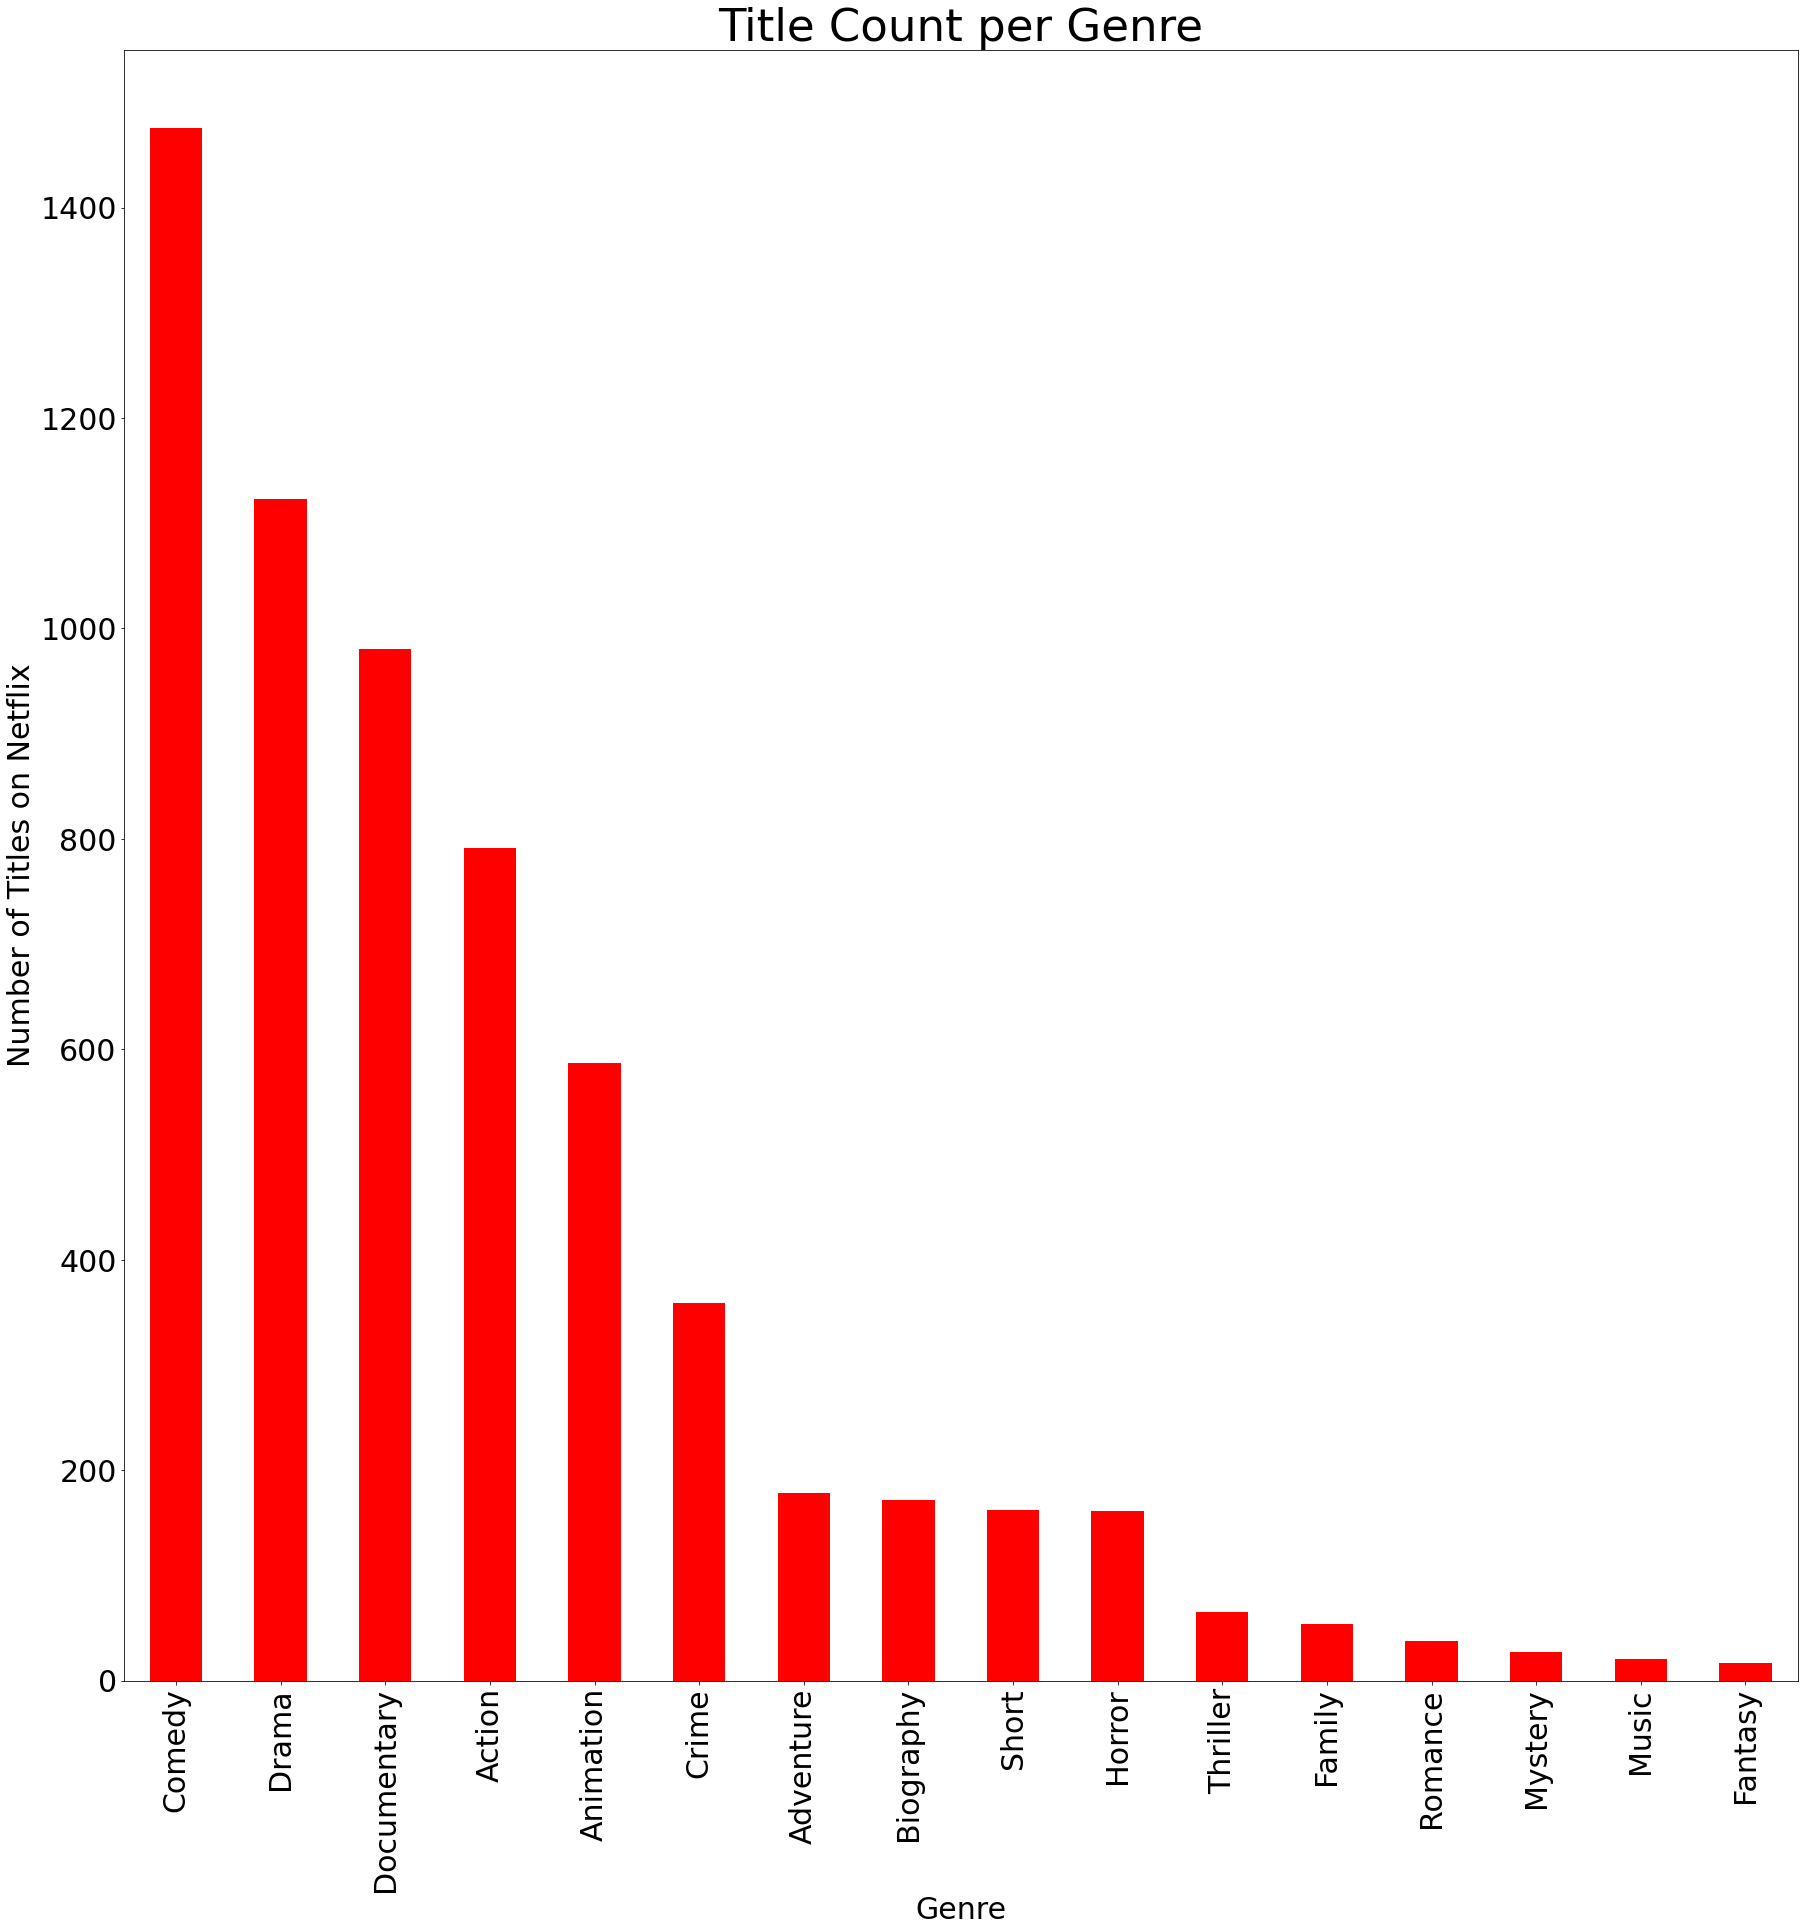

In [67]:
#graph your findings
plotting_genre_popularity= genre_popularity.plot.bar(figsize=(30,30),color='r', fontsize= 16)
genre_popularity
#add titles and labels 
plt.xlabel("Genre",fontsize = 30)
plt.ylabel("Number of Titles on Netflix",fontsize = 30)
plt.title("Title Count per Genre",fontsize = 45)
plt.xticks(fontsize= 30 ) 
plt.yticks(fontsize= 30 ) 
plt.savefig("../Graph Folder/Final Title Count per Genre.png")
plt.show()

# Research Question: 
# Which genre contains the highest average imdb ratings?

In [116]:

imdb_genre_df= imdb_genre_df[~imdb_genre_df["IMDB Rating"].str.contains('N/A')]

In [117]:
imdb_genre_df['IMDB Rating']= imdb_genre_df['IMDB Rating'].astype(float)

<ipython-input-117-a3501c062847>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genre_df['IMDB Rating']= imdb_genre_df['IMDB Rating'].astype(float)


# Statistical Analysis of Genre and IMDB Rating

In [186]:
grouped_genre= imdb_genre_df.groupby("Genres")
imdb_mean= grouped_genre["IMDB Rating"].mean()
imdb_median= grouped_genre["IMDB Rating"].median()
imdb_variance= grouped_genre["IMDB Rating"].var()
imdb_sd= grouped_genre["IMDB Rating"].std()
imdb_sem= grouped_genre["IMDB Rating"].sem()

# Assemble the resulting series into a single summary dataframe.
imdb_summary_table= pd.DataFrame({
    "Mean":imdb_mean,
    "Median":imdb_median,
    "Variance":imdb_variance,
    "Standard Deviation":imdb_sd,
    "SEM":imdb_sem

})
imdb_summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Genres,,,,,
Action,6.104859,6.20,1.593062,1.262166,0.045135
Adventure,6.336207,6.40,1.487872,1.219784,0.092472
Animation,6.569085,6.60,1.297607,1.139125,0.047340
Biography,7.025000,7.00,0.598728,0.773775,0.059000
Comedy,6.338330,6.40,1.470927,1.212818,0.031730
Crime,6.754190,6.90,1.331901,1.154080,0.060995
Documentary,7.089133,7.20,0.846932,0.920289,0.029749
Drama,6.554836,6.60,1.277365,1.130206,0.034139
Family,6.207547,6.20,1.425711,1.194031,0.164013


In [136]:
#Do a groupby function to find each genre's average IMDB rating
groups= imdb_genre_df.groupby("Genres").mean()
groups = groups.sort_values(["IMDB Rating"], ascending=False)
groups

,IMDB Rating
Genres,
Documentary,7.089133
Short,7.061446
Biography,7.025000
Music,6.880000
Crime,6.754190
Animation,6.569085
Drama,6.554836
Comedy,6.338330
Adventure,6.336207


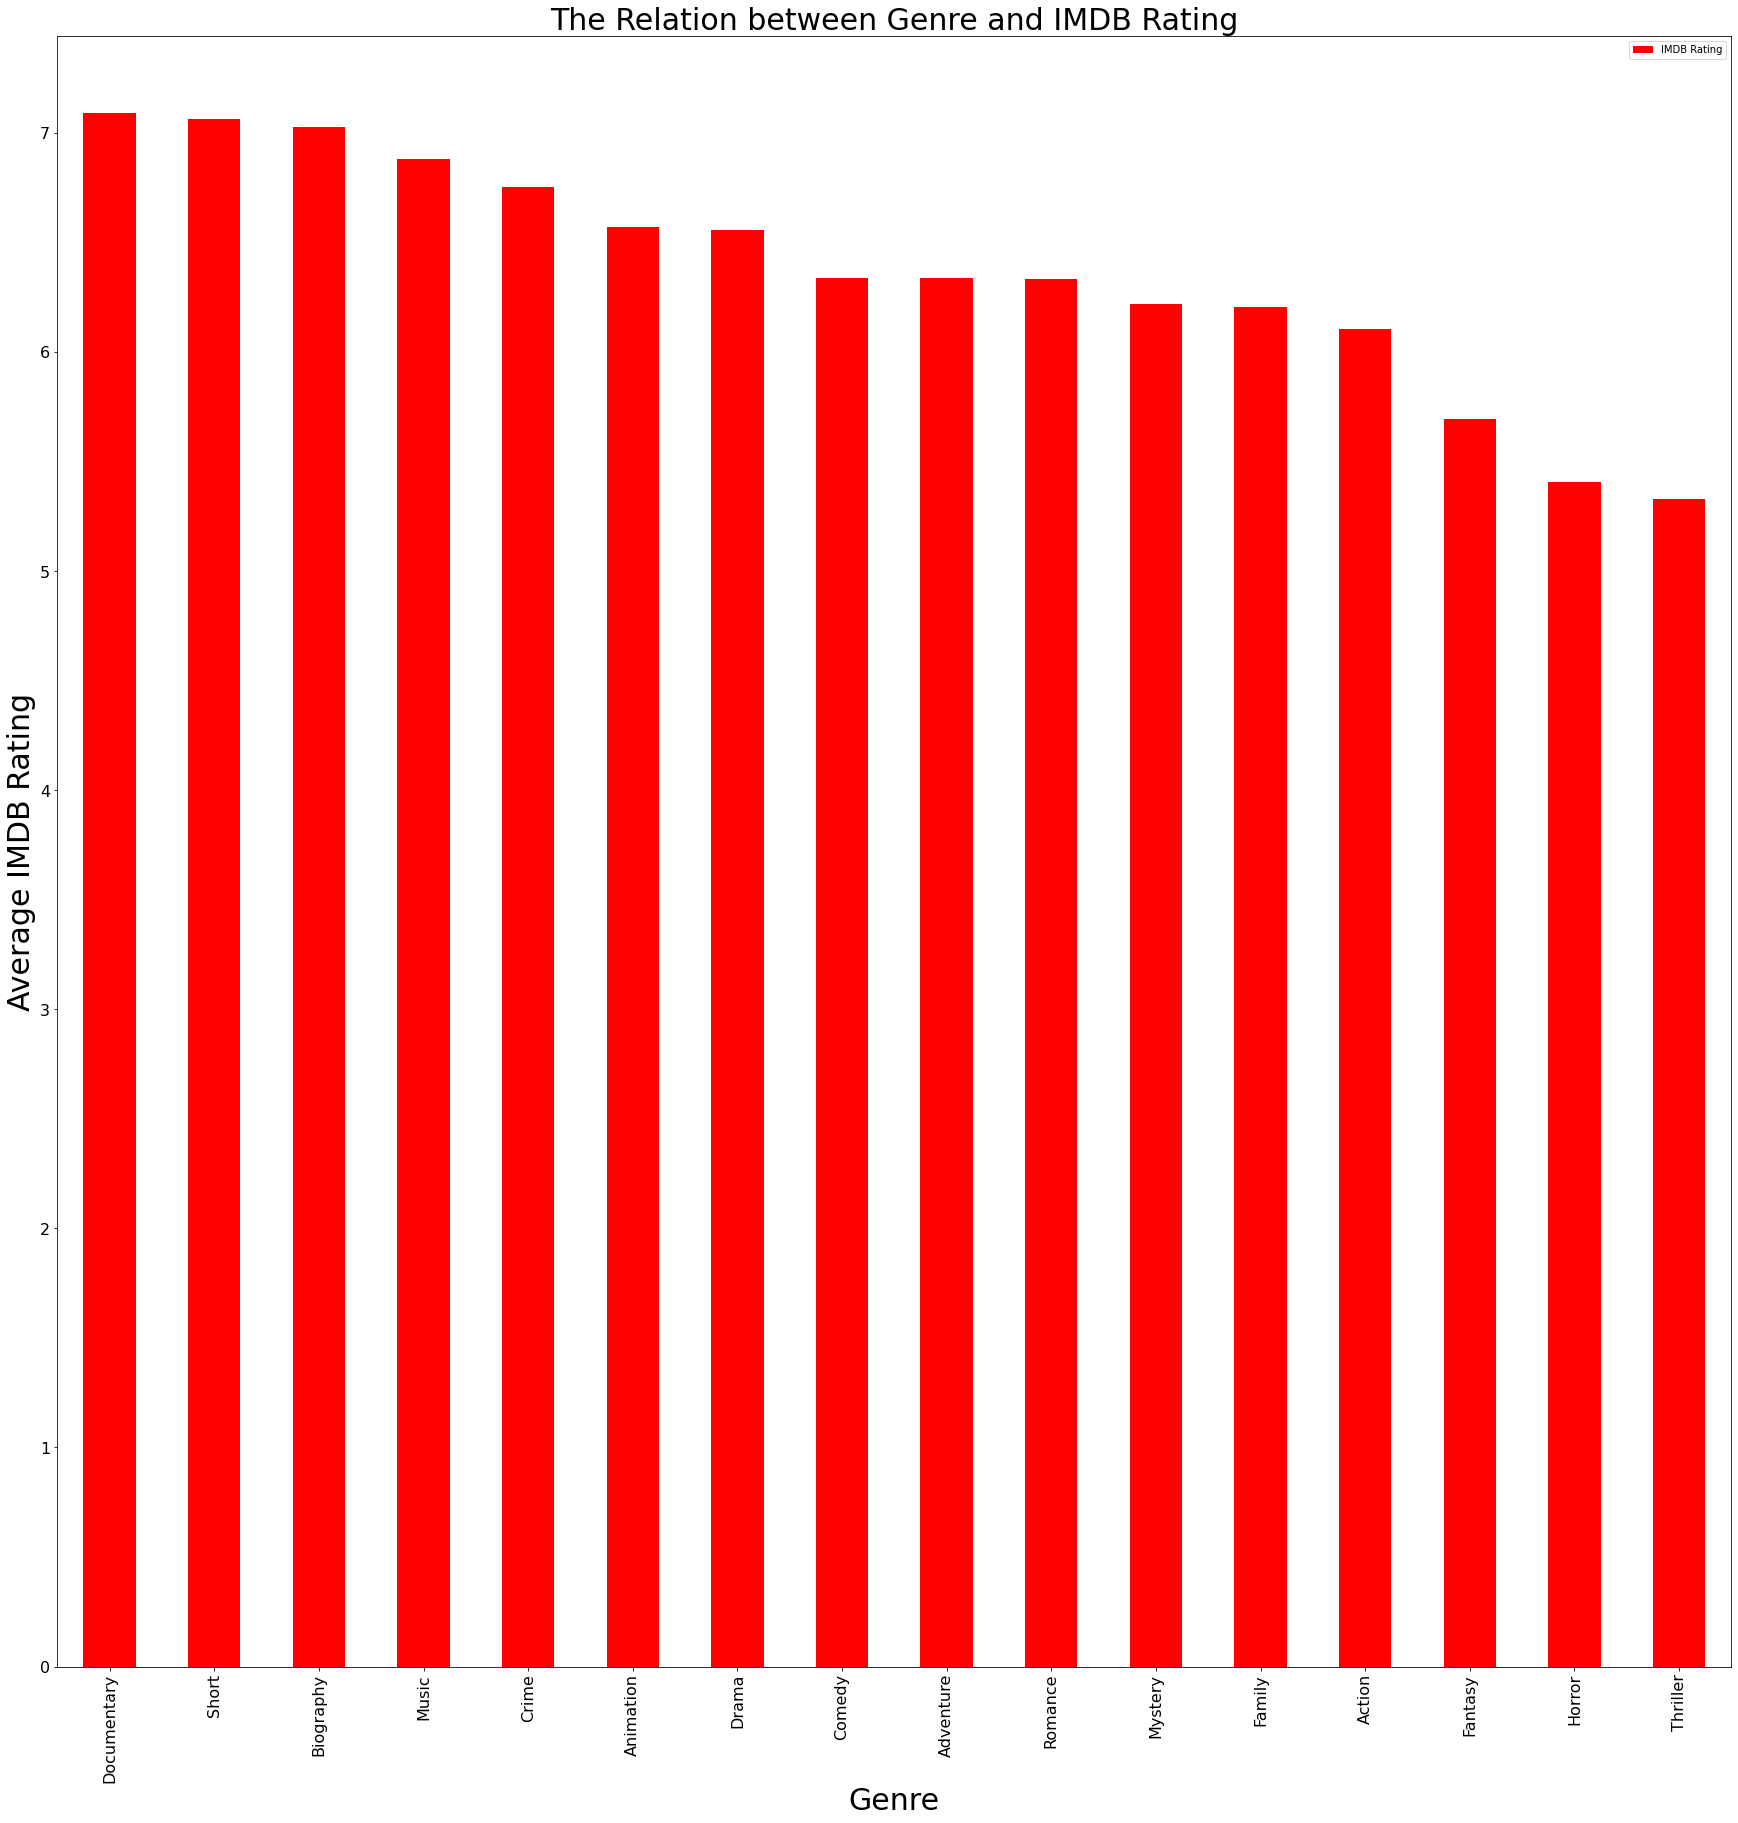

<Figure size 432x288 with 0 Axes>

In [119]:
#create a bar graph that displays each genre and its overall IMDB rating 
plotting_genre_averages= groups.plot.bar(figsize=(30,30),color='r', fontsize= 16)
groups
#add titles and labels 
plt.xlabel("Genre",fontsize = 30)
plt.ylabel("Average IMDB Rating",fontsize = 30)
plt.title("The Relation between Genre and IMDB Rating",fontsize = 30)
plt.show()
plt.savefig("../Graph Folder/Final Relation between Genre and IMDB Rating.png")
plt.show()

# Further genre analysis 
The graphs below will display the relationship between genre, ratings, and user ratings. Out of those top 5 genres we will find the amount of titles are classified under each rating (G, PG, PG13,R, NR, etc.)

In [135]:
imdb_genre_df= imdb_genre_df[imdb_genre_df != 'N/A']

In [155]:
rating_column= imdb_genre_df.loc[:, "Rating"]
new_df= pd.DataFrame({"Rating": rating_column})
new_df= new_df.dropna()
Rating_counts= new_df['Rating'].value_counts()

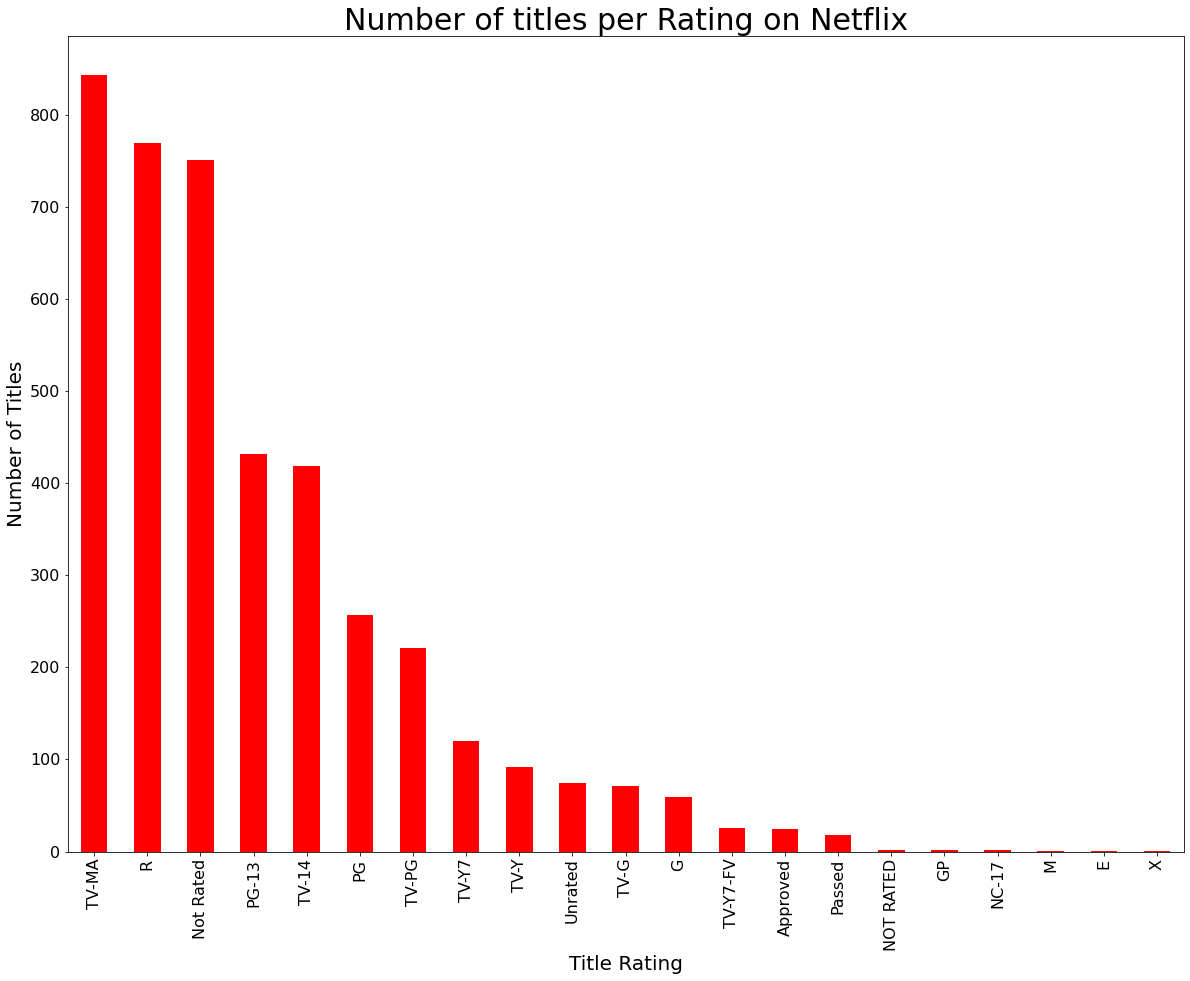

In [157]:
plotting= Rating_counts.plot.bar(figsize=(20,15),color='r', fontsize= 16,)
plt.xlabel("Title Rating",fontsize = 20)
plt.ylabel("Number of Titles",fontsize = 20)
plt.title("Number of titles per Rating on Netflix",fontsize = 30)
Rating_counts
plt.savefig("../Graph Folder/Final Number of titles per Rating on Netflix.png")
plt.show()

In [137]:
#Create a new data frame only displaying the top 5 genres 
#Documentary	7.089133
#Short	7.061446
#Biography	7.025000
#Music	6.880000
#Crime	6.754190
#Do a groupby function to find each genre's average IMDB rating

documentary_group= imdb_genre_df[imdb_genre_df['Genres']== 'Documentary']
short_group= imdb_genre_df[imdb_genre_df['Genres']== 'Short']
biography_group= imdb_genre_df[imdb_genre_df['Genres']== 'Biography']
music_group= imdb_genre_df[imdb_genre_df['Genres']== 'Music']
crime_group= imdb_genre_df[imdb_genre_df['Genres']== 'Crime']

In [138]:
#Finding out how many of each rating is present in each top 5 genre
documentary_group['Rating'].value_counts()

TV-MA        141
Not Rated    116
TV-14         79
TV-PG         63
R             30
PG-13         29
PG            23
Unrated       11
TV-G          11
G              8
Approved       2
E              1
TV-Y           1
GP             1
Name: Rating, dtype: int64

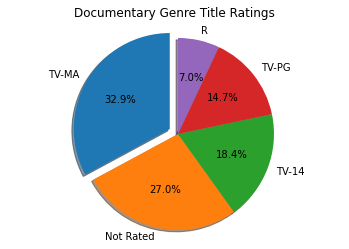

In [140]:
# Pie chart
labels = 'TV-MA', 'Not Rated', 'TV-14', 'TV-PG', 'R'
sizes = [141, 116, 79, 63, 30 ]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Documentary Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Documentary.png")
plt.show()

In [141]:
#Finding out how many of each rating is present in each top 5 genre
short_group['Rating'].value_counts()

Not Rated    7
TV-G         3
TV-MA        2
TV-14        2
R            1
Name: Rating, dtype: int64

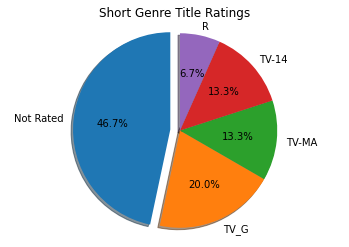

In [142]:
# Pie chart
labels = 'Not Rated', 'TV_G','TV-MA', 'TV-14', 'R'
sizes = [7, 3, 2, 2, 1]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Short Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Short.png")
plt.show()

In [143]:
biography_group['Rating'].value_counts()

R            53
PG-13        31
TV-MA        21
Not Rated    18
PG           11
TV-14         7
TV-PG         6
Unrated       1
Approved      1
Passed        1
Name: Rating, dtype: int64

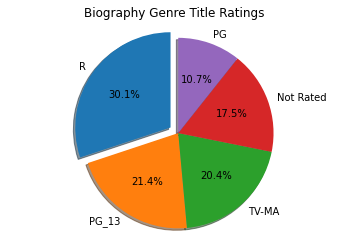

In [145]:
# Pie chart
labels = 'R', 'PG_13','TV-MA', 'Not Rated', 'PG'
sizes = [31, 22, 21, 18, 11]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Biography Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Biography.png")
plt.show()

In [146]:
music_group['Rating'].value_counts()

TV-PG        3
TV-14        3
R            1
TV-MA        1
Not Rated    1
Name: Rating, dtype: int64

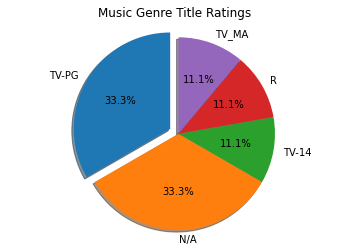

In [147]:
# Pie chart
labels = 'TV-PG', 'N/A','TV-14', 'R', 'TV_MA' 
sizes = [3, 3, 1, 1, 1]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Music Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Music.png")
plt.show()

In [148]:
crime_group['Rating'].value_counts()

R            81
TV-MA        79
Not Rated    54
TV-14        22
PG-13         9
Unrated       6
Approved      5
Passed        5
PG            3
TV-PG         3
X             1
GP            1
NOT RATED     1
Name: Rating, dtype: int64

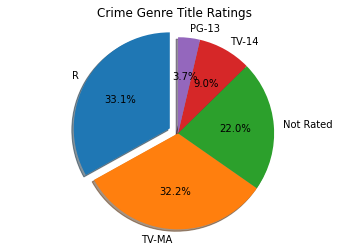

In [149]:
# Pie chart
labels = 'R', 'TV-MA','Not Rated', 'TV-14', 'PG-13'
sizes = [81, 79, 54, 22, 9]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Crime Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Crime.png")
plt.show()

# OVERALL FINDINGS FOR THE TOP 5 GENRES & THEIR TITLE RATINGS (PG, PG-13, R, etc.)


In [150]:
print("HIGHEST SCORING GENRES AND THEIR MOST POPULAR RATING")
print("-------------------------")
print("DOCUMENTARY: TV-MA")
print("-------------------------")
print("SHORT: Not Rated")
print("-------------------------")
print("BIOGRAPHY: R")
print("-------------------------")
print("MUSIC: TV-PG")
print("-------------------------")
print("CRIME: R")
print("-------------------------")

HIGHEST SCORING GENRES AND THEIR MOST POPULAR RATING
-------------------------
DOCUMENTARY: TV-MA
-------------------------
SHORT: Not Rated
-------------------------
BIOGRAPHY: R
-------------------------
MUSIC: TV-PG
-------------------------
CRIME: R
-------------------------


**After running the analysis above on the genre with the most titles instead of the genre with highest average IMDB score, it is interesting to note that......
The top 5 most frequent ratings are TV-MA,Not Rated,R, PG_13,TV-14. What this shows us is that the most produced genre is typically geared towards a more adult crowd.**

In [158]:
comedy_group= imdb_genre_df[imdb_genre_df['Genres']== 'Comedy']
comedy_group['Rating'].value_counts()

TV-MA        297
Not Rated    176
R            161
PG-13        112
TV-14        103
TV-PG         59
PG            50
TV-G          24
Unrated       20
G              9
Approved       6
Passed         3
TV-Y7          3
TV-Y           1
NC-17          1
Name: Rating, dtype: int64

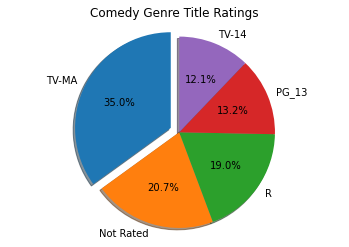

In [159]:
# Pie chart
labels = 'TV-MA','Not Rated','R', 'PG_13','TV-14'
sizes = [297, 176, 161, 112, 103]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Comedy Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by popularity Comedy.png")
plt.show()

# Further statistical investigating 
- To better portray our data, we created histograms of the most produces genre: (Comedy,) and the highest rating genre:Documentary. This will give us a better idea of the scoring components and why they fell where they did in the ratings 

In [175]:
#making df for each genre for statsical visualization 
comedy_df = imdb_genre_df.loc[imdb_genre_df['Genres'] == 'Comedy']
doc_df = imdb_genre_df.loc[imdb_genre_df['Genres'] == 'Documentary']

<function matplotlib.pyplot.show(close=None, block=None)>

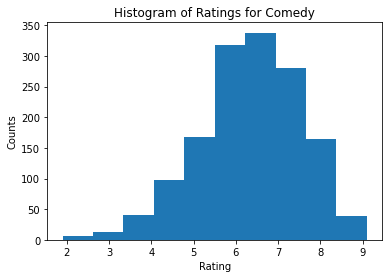

In [180]:
#comedy distribution
comedy_rating = comedy_df["IMDB Rating"]
plt.hist(comedy_rating)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Histogram of Ratings for Comedy")
plt.savefig('../Graph Folder/Final Comedy ratings histogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

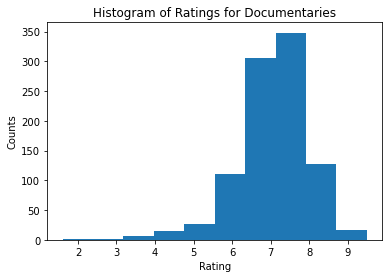

In [179]:
#doc distribution
doc_rating = doc_df["IMDB Rating"]
plt.hist(doc_rating)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Histogram of Ratings for Documentaries")
plt.savefig('../Graph Folder/Final Documentary ratings histogram')
plt.show

# Research Question:
# Does the year affect production frequency?
- We will no turn our attention back to the original dataframe Netflix Titles to see display how many titles were produced per year 

In [69]:
#making df to see how many movies/shows made per year
year_df = Netflix_Titles.loc[:, ["title", "release_year"]]
year_totals = year_df.value_counts()
year_group = year_totals.groupby('release_year')
year_count = year_group.count()
year_count_df = year_count.to_frame()
year_count_df.columns = ["Count"]
year_count_df

,Count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2017,1012
2018,1121
2019,996


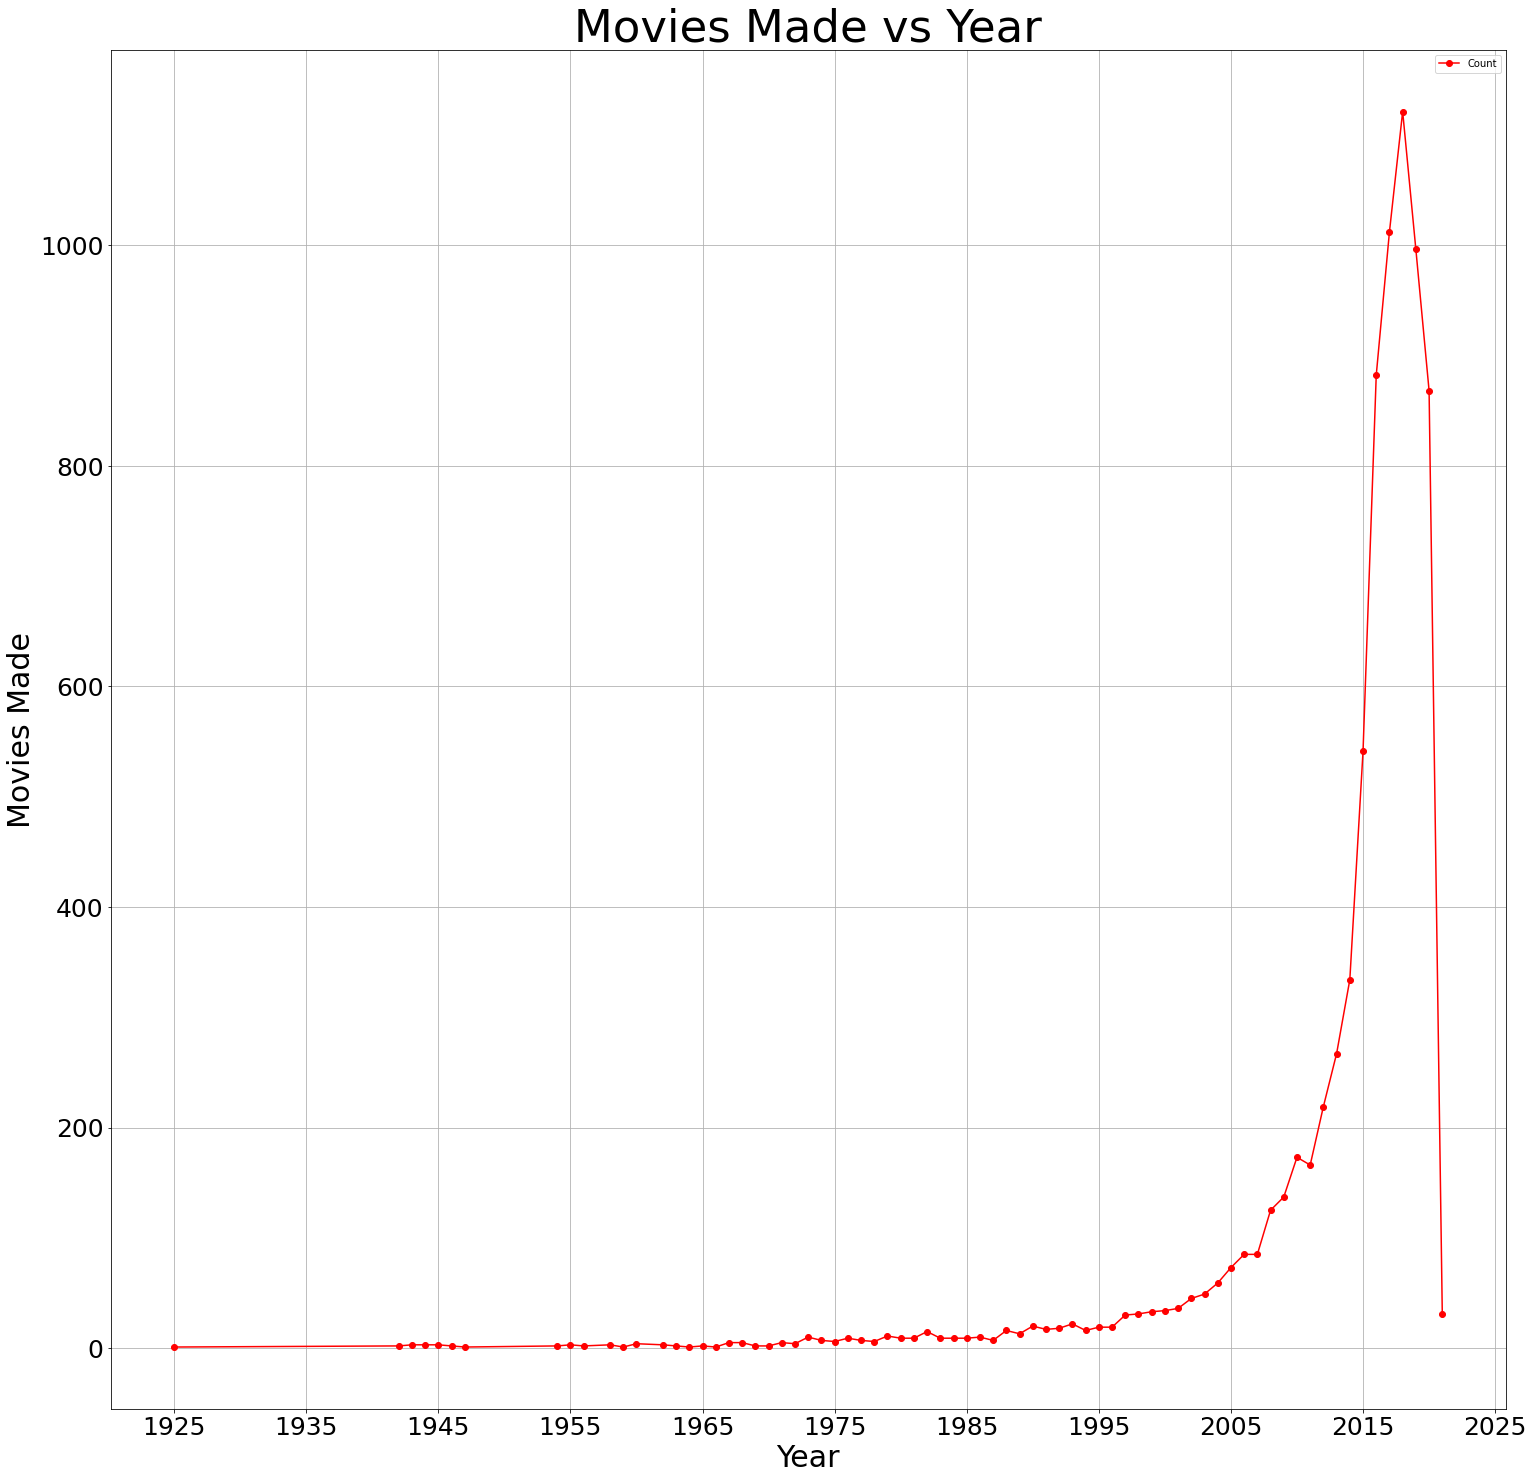

In [72]:
#making line graph of the year data 
x_axis = np.arange(len(year_count_df))
year_count_df.plot.line(figsize= (25,25), color='r', marker = 'o' )
plt.title('Movies Made vs Year', fontsize= 45)
plt.xlabel('Year', fontsize= 30)
plt.ylabel('Movies Made', fontsize= 30)
plt.grid(True)
plt.xticks(range(1925,2030, 10),fontsize= 25)
plt.yticks(fontsize= 25 ) 
plt.savefig("../Graph Folder/Final Movies Made Per Year.png")
plt.show()

# Further Analysis of Release Year as it relates to IMDB Rating 
To further support our analysis, we will merge a title's release date with it's IMDB rating in order to see which year held the highest rated titles.

In [79]:
Netflix_Titles.rename(columns={'title': 'Title'}, inplace=True)

In [80]:
#merging the data into a new frame 
merge_df = pd.merge(imdb_genre_df, Netflix_Titles, on = "Title")

#getting just the info i want 
info_df = merge_df[["Title", "IMDB Rating", "release_year"]]

#renaming data frame 
info_df = info_df.rename(columns={"release_year": "Release Year"})

#sorting by year 
info_df = info_df.sort_values('Release Year', ascending = True)
info_df

,Title,IMDB Rating,Release Year
3400,Prelude to War,7.0,1942
4264,The Battle of Midway,6.1,1942
5115,Tunisian Victory,6.7,1944
4704,The Negro Soldier,5.9,1944
3711,San Pietro,6.7,1945
...,...,...,...
985,Cobra Kai,8.6,2021
2643,Lupin,7.5,2021
1904,Hilda,8.6,2021
1038,"Crack: Cocaine, Corruption & Conspiracy",6.7,2021


<function matplotlib.pyplot.show(close=None, block=None)>

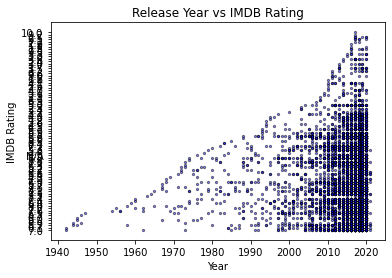

In [85]:
#making scatter plot
x_val = info_df["Release Year"]
y_val = info_df["IMDB Rating"]
plt.scatter(x_val, y_val, marker = '.', facecolors = 'b', 
            edgecolors = 'k', s = 20, alpha = 0.5)
plt.title("Release Year vs IMDB Rating")
plt.xlabel("Year")
plt.ylabel("IMDB Rating")

#save and print 
plt.savefig('../Graph Folder/Final Release Year vs IMDB Rating.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

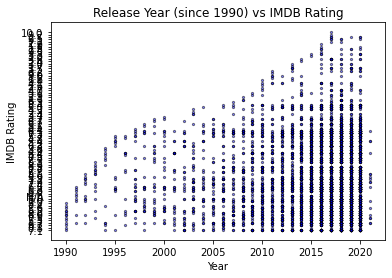

In [86]:
#getting data from 1990 and on 
since_1990 = info_df.loc[info_df['Release Year'] >= 1990]
since_1990

#making scatter plot
x_val = since_1990["Release Year"]
y_val = since_1990["IMDB Rating"]
plt.scatter(x_val, y_val, marker = '.', facecolors = 'b', 
            edgecolors = 'k', s = 20, alpha = 0.5)
plt.title("Release Year (since 1990) vs IMDB Rating")
plt.xlabel("Year")
plt.ylabel("IMDB Rating")

#save and print 
plt.savefig('../Graph Folder/Final Release Year vs IMDB Rating since 1990.png')
plt.show

# Research Question:
# Which country produces the most movies/tv shows?

In [160]:
#Load data frame that is organized by country
UniqueCountry = "../Data/UniqueCountry.csv"
UniqueCountry = pd.read_csv(UniqueCountry)

In [161]:
#Netflix_Titles["type"].pd.get_dummies()
pd.get_dummies(UniqueCountry, columns=['type'])

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_Movie,type_TV Show
0,s1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,8/14/20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,1
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,12/23/16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,0
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,12/20/18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,0
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,11/16/17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,0
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1/1/20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,s7785,Zulu Man in Japan,NaN,Nasty C,NaN,9/25/20,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",1,0
9566,s7786,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,10/31/20,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,0,1
9567,s7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,3/1/20,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,1,0
9568,s7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,Canada,3/1/20,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,1,0


In [163]:
country_column= UniqueCountry.loc[:, "country"]
type_column= UniqueCountry.loc[:, "type"]

In [164]:
country_column
new_df= pd.DataFrame({"Country": country_column, "Type": type_column})
new_df= new_df.dropna()
new_df
by_country = new_df['Country'].value_counts()
by_country
by_country_df = by_country.to_frame()
by_country.head(10)

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: Country, dtype: int64

In [165]:
Netflix_Titles = pd.get_dummies(UniqueCountry, columns=['type'])
Netflix_Titles[['type_Movie','type_TV Show','country']].groupby('country').sum()
UniqueCountry.groupby(['country','type']).count().sort_values('country',ascending=False)
type_df = UniqueCountry.groupby(["country", "type"]).sum()
type_df

,,release_year
country,type,
Afghanistan,Movie,2016
Albania,Movie,2018
Algeria,Movie,3999
Angola,Movie,2020
Argentina,Movie,128992
...,...,...
Venezuela,Movie,6040
Vietnam,Movie,10084
West Germany,Movie,5933


In [166]:
new_df= pd.DataFrame({"Country": country_column, "Type": type_column})
new_df= new_df.dropna()
new_df
by_country = new_df['Country'].value_counts()
by_country
by_country_df = by_country.to_frame()
by_country.head(10)

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: Country, dtype: int64

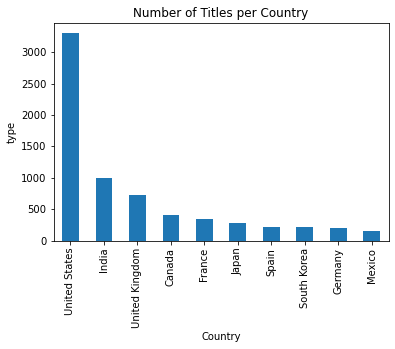

<Figure size 432x288 with 0 Axes>

In [174]:
# Create a bar chart based off of the group series from before
by_country_chart = by_country.head(10).plot(kind='bar')

# Set the xlabel and ylabel using class methods
by_country_chart.set_xlabel("Country")
by_country_chart.set_ylabel("type")

plt.title("Number of Titles per Country")
plt.savefig('../Graph Folder/Final Number of Titles per Country BAR.png')
plt.show()
plt.tight_layout()

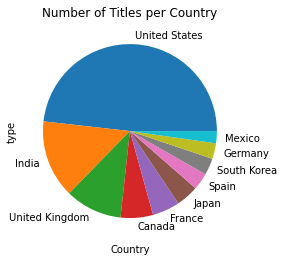

<Figure size 432x288 with 0 Axes>

In [173]:
# Create a bar chart based off of the group series from before
by_country_chart = by_country.head(10).plot(kind='pie')

# Set the xlabel and ylabel using class methods
by_country_chart.set_xlabel("Country")
by_country_chart.set_ylabel("type")
plt.title("Number of Titles per Country")
plt.savefig('../Graph Folder/Final Number of Titles per Country PIE.png')
plt.show()
plt.tight_layout()

In [171]:
print("The United States produces the most titles!!")

The United States produces the most titles!!


In [169]:
genre_df = UniqueCountry.loc[:, "country"]
updated_genre_df = genre_df.str.split(',', expand = True)
updated_genre_df
#updated_genre_df.columns
primary_genre = updated_genre_df[0].value_counts()
primary_genre_df = primary_genre.to_frame()
primary_genre_df
primary_genre_df.columns
primary_genre_df.columns = ["Total"]
primary_genre_df

,Total
United States,3297
India,990
United Kingdom,723
Canada,412
France,349
...,...
Kazakhstan,1
Sri Lanka,1
Syria,1
Dominican Republic,1


In [170]:
Netflix_Titles = pd.get_dummies(UniqueCountry, columns=['type'])
Netflix_Titles[['type_Movie','type_TV Show','country']].groupby('country').sum()
UniqueCountry.groupby(['country','type']).count().sort_values('country',ascending=False)
type_df = UniqueCountry.groupby(["country", "type"]).sum()
type_df

,,release_year
country,type,
Afghanistan,Movie,2016
Albania,Movie,2018
Algeria,Movie,3999
Angola,Movie,2020
Argentina,Movie,128992
...,...,...
Venezuela,Movie,6040
Vietnam,Movie,10084
West Germany,Movie,5933
